In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.cbook import boxplot_stats

In [2]:
light = pd.read_csv('light.csv', sep=';')
light.fillna(0, inplace=True)
light['Błędy'] = light['Błędy'].astype(np.int16)
light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LP               71 non-null     int64  
 1   Imię i Nazwisko  71 non-null     object 
 2   1                71 non-null     float64
 3   2                71 non-null     float64
 4   3                71 non-null     float64
 5   4                71 non-null     float64
 6   5                71 non-null     float64
 7   6                71 non-null     float64
 8   Błędy            71 non-null     int16  
 9   Uwagi            71 non-null     object 
dtypes: float64(6), int16(1), int64(1), object(2)
memory usage: 5.3+ KB


In [3]:
light.sample(7)

LP Imię i Nazwisko      1      2      3      4      5    6  Błędy Uwagi
15  16               0  29.94  19.45  16.82  17.00  16.03  0.0      3     0
34  35               0  23.24  18.35  17.95  18.83  15.67  0.0      0     0
23  24               0  28.06  20.77  18.28  21.03  16.75  0.0      1     0
37  38            Gr.4  54.51  38.25  36.97  32.99  34.86  0.0      0     0
66  67               0  30.84  34.14  28.48  21.17  21.84  0.0      0     0
67  68               0  27.31  21.37  20.46  25.29  21.01  0.0      0     0
56  57               0  29.55  20.58  19.17  19.14  18.64  0.0      0     0

In [4]:
light.describe()

LP          1        2          3          4          5     6  \
count  71.000000  71.000000  71.0000  71.000000  71.000000  71.000000  71.0   
mean   36.000000  31.117183  25.9900  24.071831  22.258732  22.381831   0.0   
std    20.639767   7.253125   7.4998   6.098121   4.317411   6.847534   0.0   
min     1.000000  19.260000  14.5300  11.550000  12.770000  10.810000   0.0   
25%    18.500000  26.015000  21.0050  20.370000  19.290000  18.150000   0.0   
50%    36.000000  29.940000  24.3600  22.860000  22.090000  21.610000   0.0   
75%    53.500000  35.370000  29.2400  26.710000  25.170000  25.115000   0.0   
max    71.000000  54.510000  52.0000  44.550000  32.990000  49.750000   0.0   

           Błędy  
count  71.000000  
mean    0.577465  
std     1.305614  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     0.500000  
max     7.000000

In [5]:
light[['1','2','3','4','5']].quantile([.0035, .25, .5, .75, .9965])

1         2       3        4        5
0.0035  19.42905  14.67455  12.040  12.8729  11.2363
0.2500  26.01500  21.00500  20.370  19.2900  18.1500
0.5000  29.94000  24.36000  22.860  22.0900  21.6100
0.7500  35.37000  29.24000  26.710  25.1700  25.1150
0.9965  53.12330  50.89995  42.933  32.5686  48.9709

/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.7'` for same effect.
  warnings.warn(msg, FutureWarning)


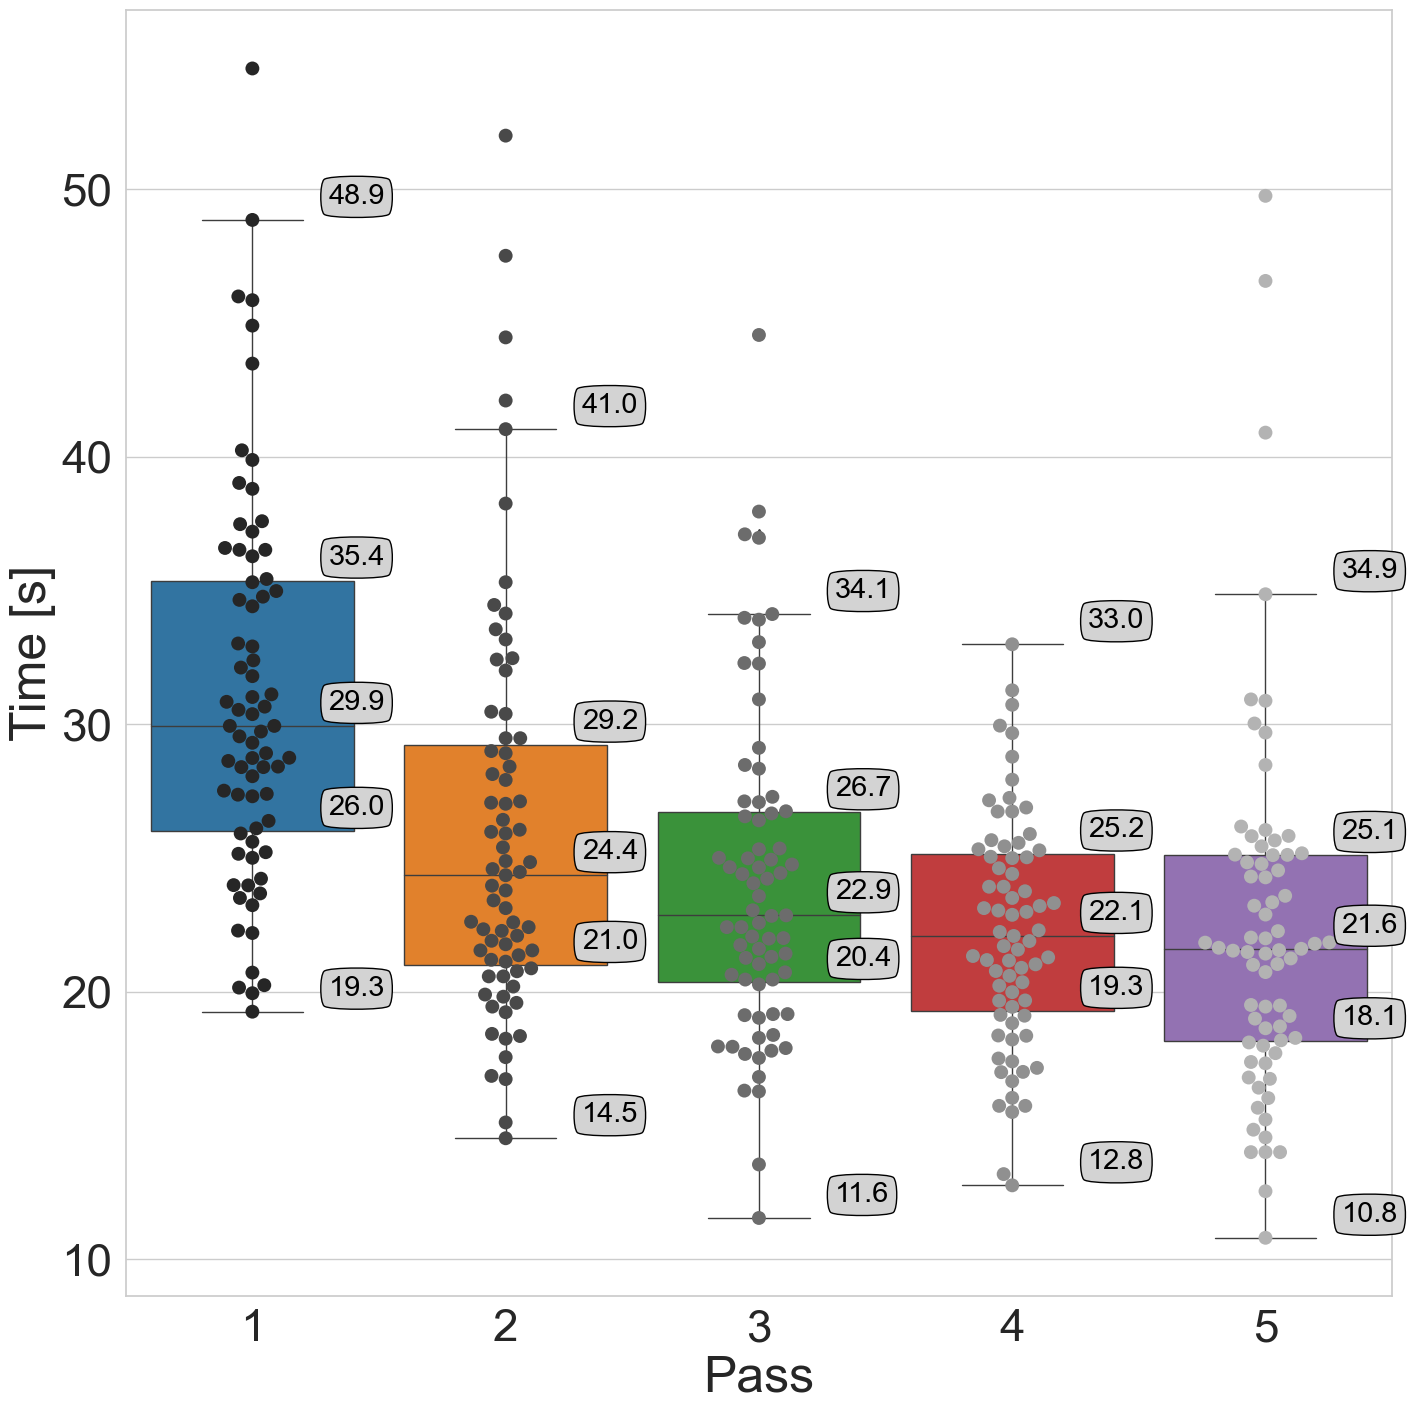

In [6]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=3)
plt.rcParams['figure.figsize'] = (15, 15)

g=sns.boxplot(data=light[['1','2','3','4','5']], 
              linewidth=1,
             );
sns.swarmplot(data=light[['1','2','3','4','5']], size=10, color='.7')

stats = boxplot_stats(light[['1','2','3','4','5']].values)
for tick in g.get_xticks():
    for q in ['whishi', 'q3', 'med', 'q1', 'whislo']:
        g.text(tick + .3,
               stats[tick][q] + .6,
               f'{stats[tick][q]:4.1f}', 
               horizontalalignment='left',
               size='xx-small',
               color='black',
               bbox=dict(facecolor='lightgrey', 
                         edgecolor='black',
                        boxstyle='round4'))

g.set_xlabel('Pass')
g.set_ylabel('Time [s]')

plt.tight_layout()

plt.savefig('light.png')

In [7]:
light[str(1)].quantile([.0035, .25, .5, .75, .9965]).to_list()[0]

19.42905

/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  fu

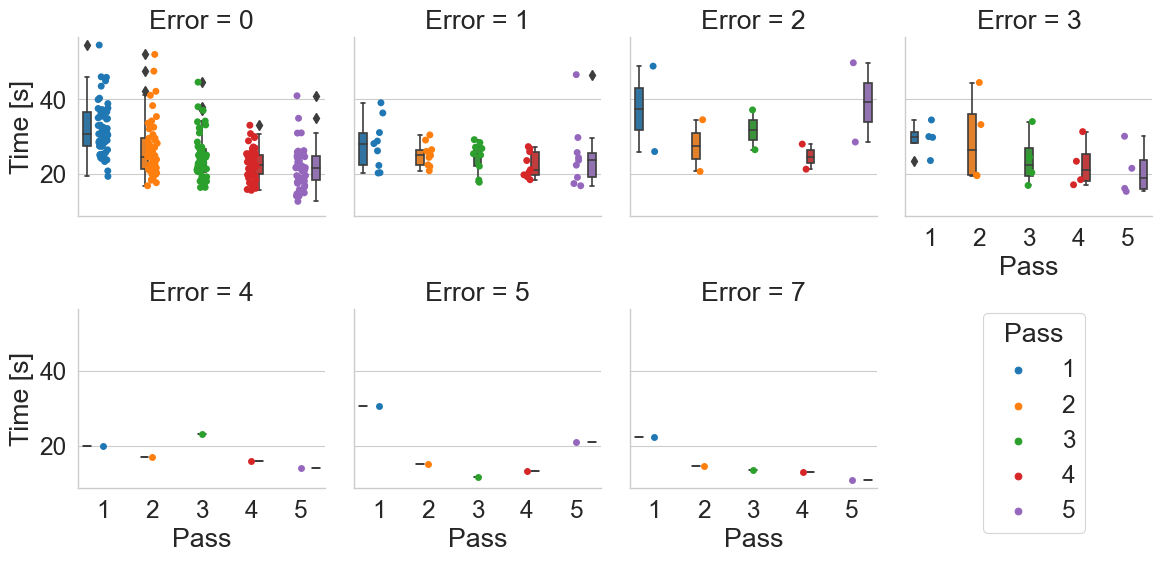

In [8]:
light_l = light.melt(id_vars=light.columns[[0, 1, 7, 8, 9]].tolist())
light_l.rename(columns={"value":'Time [s]', 
                'variable':"Pass",
               'Błędy':'Error'}, 
              inplace=True)

sns.set_context('paper', font_scale=2)
g=sns.FacetGrid(light_l,
               col='Error',
               col_wrap=4,
               legend_out=False)
g.map_dataframe(sns.boxplot,
               x='Pass',
               y='Time [s]',
               hue='Pass',
               palette=sns.color_palette())
g.map_dataframe(sns.stripplot,
                x='Pass',
                y='Time [s]',
                hue='Pass',
                size=5,
                palette=sns.color_palette()    );
g.add_legend()
sns.move_legend(g, 
                'lower right',
                title="Pass",
               frameon=True,
               bbox_to_anchor=(.93, .06))
# plt.legend(loc='lower right')
g.tight_layout()

plt.savefig('light_error.png')

In [9]:
point = pd.read_csv('point.csv', sep=';')
# point.loc[point['Błędy']=='', 'Błędy']=0
point.fillna(0, inplace=True)
point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LP               71 non-null     int64  
 1   Imię i Nazwisko  71 non-null     object 
 2   1                71 non-null     float64
 3   2                71 non-null     float64
 4   3                71 non-null     float64
 5   4                71 non-null     float64
 6   5                71 non-null     float64
 7   6                71 non-null     float64
 8   Błędy            71 non-null     float64
 9   Uwagi            71 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 5.7+ KB


/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.7'` for same effect.
  warnings.warn(msg, FutureWarning)


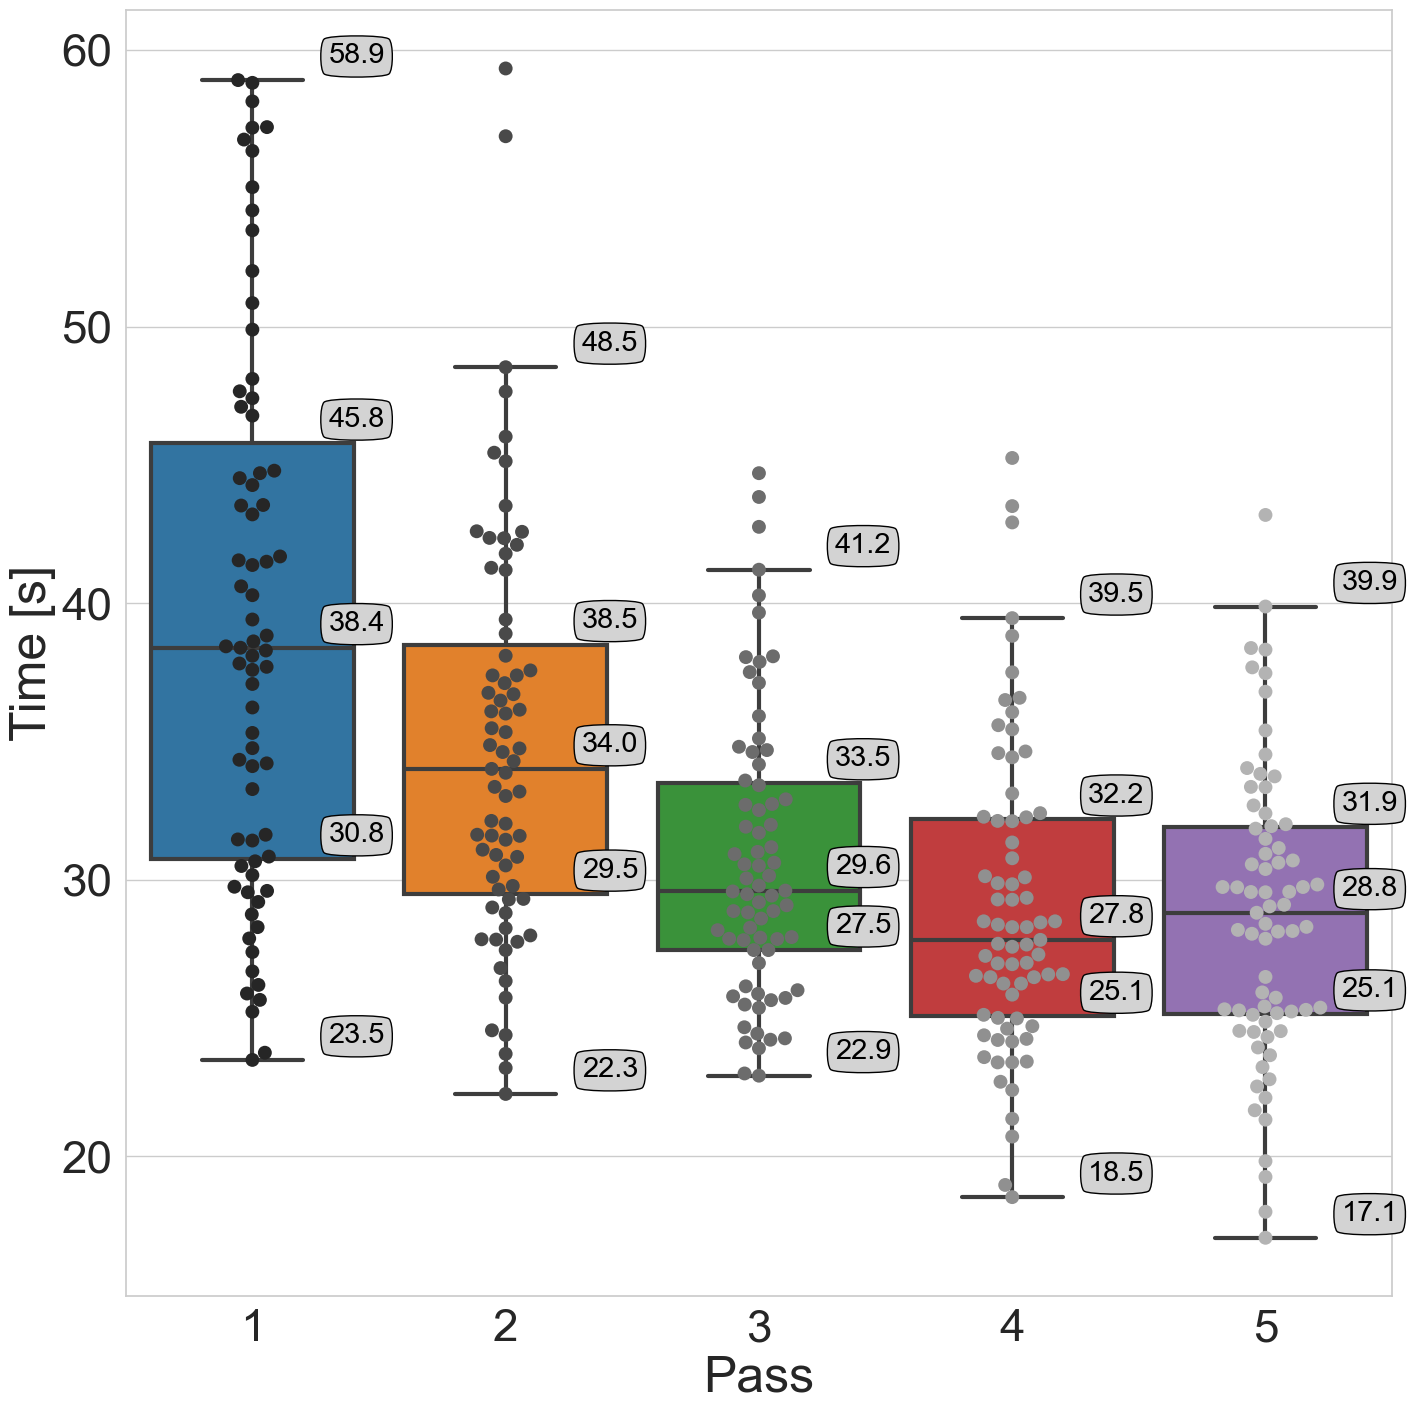

In [10]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.set_context('notebook', font_scale=3)
# plt.rc('xtick', labelsize=22)
# plt.rc('ytick', labelsize=24)
sns.set_style('whitegrid')

g=sns.boxplot(data=point[['1','2','3','4','5']], linewidth=3);
sns.swarmplot(data=point[['1','2','3','4','5']], size=10, color='.7')

stats = boxplot_stats(point[['1','2','3','4','5']].values)
for tick in g.get_xticks():
    for q in ['whishi', 'q3', 'med', 'q1', 'whislo']:
        g.text(tick + .3,
               stats[tick][q] + .6,
               f'{stats[tick][q]:4.1f}', 
               horizontalalignment='left',
               size='xx-small',
               color='black',
               bbox=dict(facecolor='lightgrey', 
                         edgecolor='black',
                        boxstyle='round4'))




g.set_xlabel('Pass')
g.set_ylabel('Time [s]')

plt.tight_layout()

plt.savefig('point.png')

In [11]:
point.columns.tolist()

['LP', 'Imię i Nazwisko', '1', '2', '3', '4', '5', '6', 'Błędy', 'Uwagi']

/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  fu

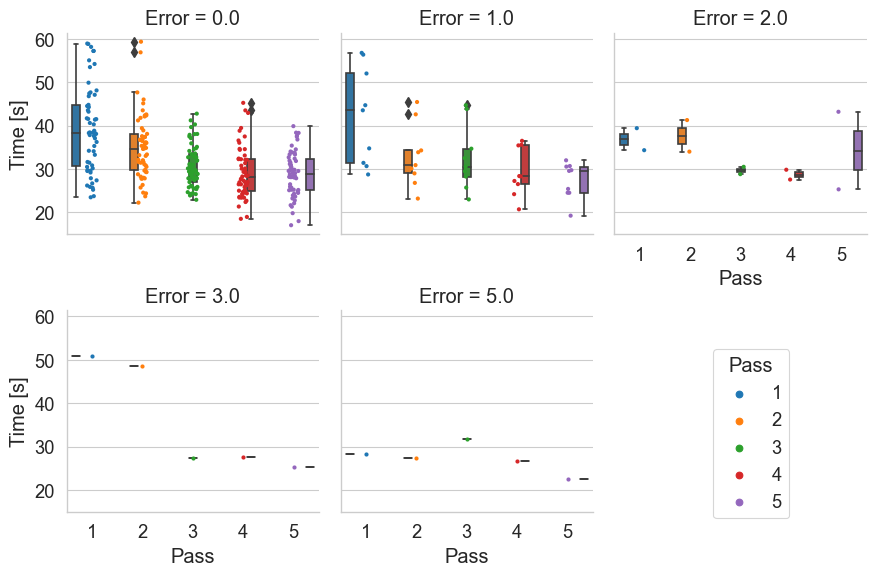

In [12]:
point_l = point.melt(id_vars=point.columns[[0, 1, 7, 8, 9]].tolist())
point_l.loc[point_l['Błędy']=='',['Błędy']]='0'
point_l['Błędy'].astype(np.int16 )
point_l['variable'].astype(np.int16)

point_l.rename(columns={"value":'Time [s]', 
                'variable':"Pass",
               'Błędy':'Error'}, 
              inplace=True)
point_l['Error'].fillna(0, inplace=True)

sns.set_context('paper', font_scale=1.5)
g=sns.FacetGrid(point_l,
               col='Error',
               col_wrap=3,
               legend_out=False)
g.map_dataframe(sns.boxplot,
               x='Pass',
               y='Time [s]',
               hue='Pass',
               palette=sns.color_palette())
g.map_dataframe(sns.stripplot,
                x='Pass',
                y='Time [s]',
                hue='Pass',
                size=3,
                palette=sns.color_palette()    )
g.add_legend()
sns.move_legend(g, 
                'lower right',
                title="Pass",
               frameon=True,
               bbox_to_anchor=(.9, .1))
g.tight_layout()

plt.savefig('point_error.png')

/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.7'` for same effect.
  warnings.warn(msg, FutureWarning)


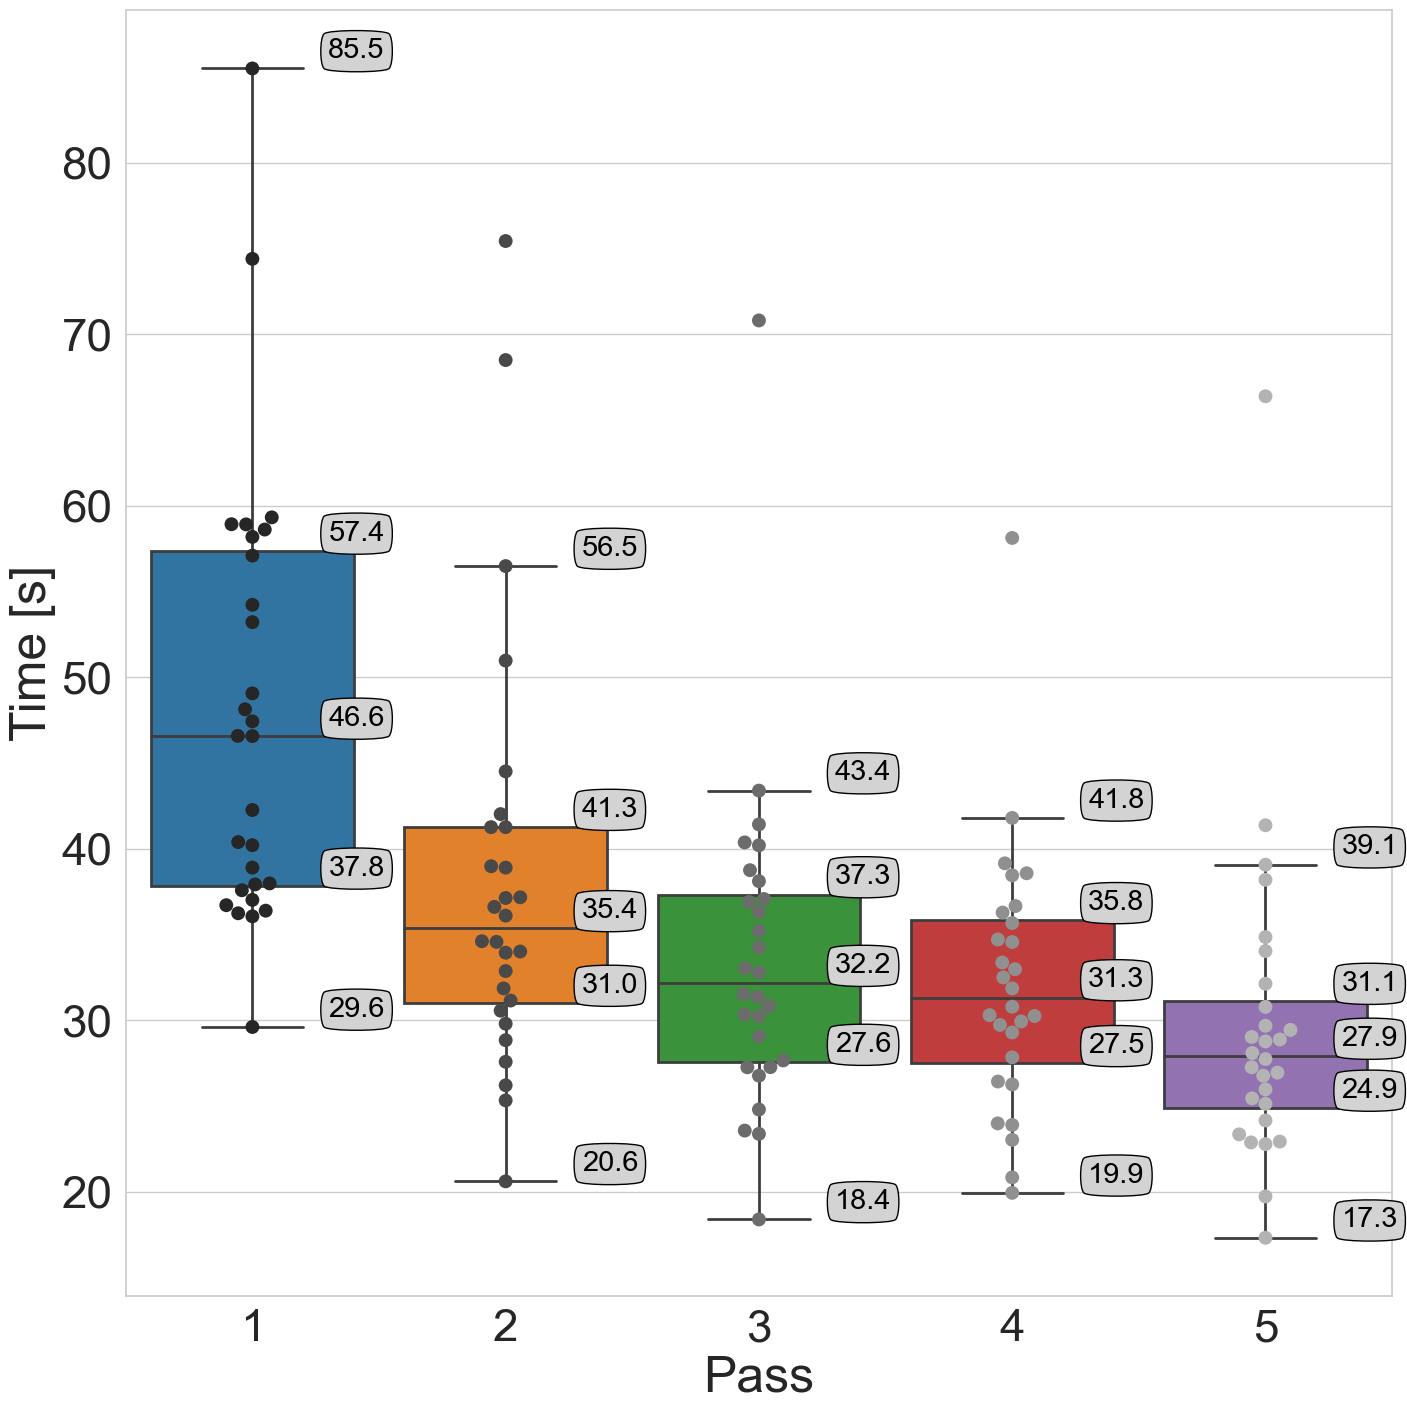

In [13]:
paper = pd.read_csv('paper.csv', sep='\t')
paper=paper[paper['1'].isna()==False]
paper['Błędy']=paper['Błędy'].astype('int')

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=3)
plt.rcParams['figure.figsize'] = (15, 15)
# plt.rc('xtick', labelsize=22)
# plt.rc('ytick', labelsize=24)

g=sns.boxplot(data=paper[['1','2','3','4','5']], linewidth=2);
sns.swarmplot(data=paper[['1','2','3','4','5']], size=10, color='.7', ax=g.axes)

stats = boxplot_stats(paper[['1','2','3','4','5']].values)
for tick in g.get_xticks():
    for q in ['whishi', 'q3', 'med', 'q1', 'whislo']:
        g.text(tick + .3,
               stats[tick][q] + .6,
               f'{stats[tick][q]:4.1f}', 
               horizontalalignment='left',
               size='xx-small',
               color='black',
               bbox=dict(facecolor='lightgrey', 
                         edgecolor='black',
                        boxstyle='round4'))

g.set_xlabel('Pass')
g.set_ylabel('Time [s]')
# g.set_title('Pick-by-Paper')

plt.tight_layout()

plt.savefig('paper.png')

/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/marcin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  fu

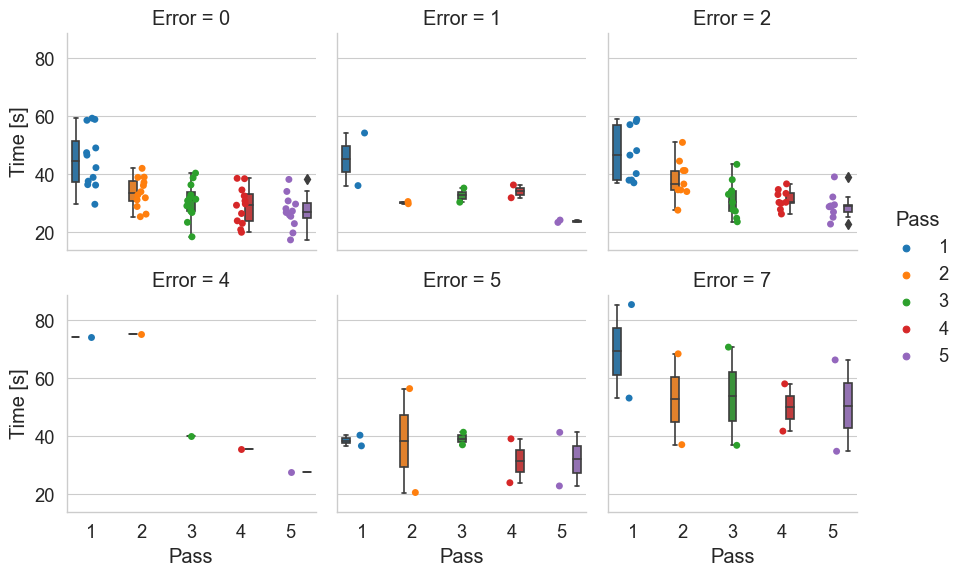

In [14]:
paper_l = paper.melt(id_vars=paper.columns[[0, 1, 7, 8, 9]].tolist())
paper_l.loc[paper_l['Błędy']=='',['Błędy']]=0

paper_l.rename(columns={"value":'Time [s]', 
                'variable':"Pass",
               'Błędy':'Error'}, 
              inplace=True)

paper_l['Error'].fillna('0', inplace=True)
# paper_l['Error'].astype("int")
# paper_l['Pass'].astype('int')

sns.set_context('paper', font_scale=1.5)
g=sns.FacetGrid(paper_l,
               col='Error',
               col_wrap=3);
g.map_dataframe(sns.boxplot,
               x='Pass',
               y='Time [s]',
               hue='Pass',
               palette=sns.color_palette());
g.map_dataframe(sns.stripplot,
                x='Pass',
                y='Time [s]',
                hue='Pass',
                size=5,
                palette=sns.color_palette()    );
g.add_legend(title="Pass")
# sns.move_legend(g, 
#                 'lower right',
#                 title="Pass",
#                frameon=True,
#                bbox_to_anchor=(.93, .8),
#                ncol=5)
g.tight_layout()

plt.savefig('paper_error.png')

In [15]:
paper['System']='Paper'
light['System']='Light'
point['System']='Point'

In [16]:
paper = paper[paper['1'].isna()==False]
paper['System'] = 'Paper'
paper

LP Imię i Nazwisko      1      2      3      4      5   6  Błędy  \
28  29            Gr.3  37.99  44.52  24.81  36.67  29.45 NaN      2   
29  30             NaN  37.93  34.58  43.40  29.94  28.78 NaN      2   
30  31             NaN  36.72  20.62  41.43  24.00  22.89 NaN      5   
31  32             NaN  49.07  31.16  18.40  19.95  17.33 NaN      0   
32  33             NaN  37.03  34.62  23.58  33.38  28.89 NaN      2   
33  34             NaN  36.25  25.34  23.39  23.04  19.74 NaN      0   
34  35             NaN  48.14  27.59  27.67  27.85  22.79 NaN      2   
35  36             NaN  46.59  36.11  32.81  30.80  28.10 NaN      0   
36  37             NaN  38.91  33.95  40.38  23.91  29.69 NaN      0   
52  53    Zaoczni gr.1  53.22  37.14  36.91  41.81  34.86 NaN      7   
53  54             NaN  58.62  31.87  31.54  29.74  30.79 NaN      0   
54  55             NaN  59.33  42.03  38.76  38.46  38.20 NaN      0   
55  56             NaN  58.92  50.98  33.05  32.99  32.14 NaN      2   
56  57             NaN  54.23  30.57  30.34  31.87  23.36 NaN      1   
57  58             NaN  46.58  34.02  30.25  30.26  29.04 NaN      2   
58  59             NaN  58.93  38.99  31.38  32.51  26.78 NaN      0   
59  60             NaN  40.40  56.49  37.08  39.16  41.38 NaN      5   
60  61             NaN  58.19  41.27  38.12  34.72  26.96 NaN      2   
61  62             NaN  47.44  37.18  29.07  34.57  34.05 NaN      0   
62  63    Zaoczni gr.2  57.10  41.27  34.25  30.31  39.08 NaN      2   
63  64             NaN  36.40  32.88  36.32  38.58  25.46 NaN      0   
64  65             NaN  74.40  75.44  40.21  35.68  27.75 NaN      4   
65  66             NaN  42.27  38.91  30.85  20.85  27.27 NaN      0   
66  67             NaN  36.07  29.81  35.22  36.29  24.17 NaN      1   
67  68             NaN  40.22  36.62  27.27  26.27  25.14 NaN      2   
68  69             NaN  85.50  68.50  70.81  58.13  66.39 NaN      7   
69  70             NaN  29.62  26.22  27.28  26.44  22.94 NaN      0   
70  71             NaN  37.59  28.85  26.78  29.30  25.98 NaN      0   

                      Uwagi System  
28                      NaN  Paper  
29                      NaN  Paper  
30                      NaN  Paper  
31                      NaN  Paper  
32                      NaN  Paper  
33                      NaN  Paper  
34                      NaN  Paper  
35                      NaN  Paper  
36                      NaN  Paper  
52                      NaN  Paper  
53                      NaN  Paper  
54                      NaN  Paper  
55                      NaN  Paper  
56                      NaN  Paper  
57                      NaN  Paper  
58                      NaN  Paper  
59                      NaN  Paper  
60                      NaN  Paper  
61                      NaN  Paper  
62                      NaN  Paper  
63                      NaN  Paper  
64                      NaN  Paper  
65                      NaN  Paper  
66                      NaN  Paper  
67                      NaN  Paper  
68                      NaN  Paper  
69  9 lat pracy w magazynie  Paper  
70                      NaN  Paper

In [17]:
dane=paper[['LP', str(1), 'System']]
dane.columns=['LP','Time', 'System']
dane['Pass']=1
for passing in [2,3,4,5]:
    tmp = paper[['LP', str(passing), 'System']].copy()
    tmp.columns = ['LP', 'Time', "System"]
    tmp['Pass'] = passing
    dane = pd.concat([dane, tmp], ignore_index=True)
   # dane = pd.concat([dane, tmp], ignore_index=True)
for passing in [1,2,3,4,5]:
    tmp = light[['LP', str(passing), 'System']].copy()
    tmp.columns = ['LP', 'Time', "System"]
    tmp['Pass'] = passing
    dane = pd.concat([dane, tmp], ignore_index=True)

for passing in [1,2,3,4,5]:
    tmp = point[['LP', str(passing), 'System']].copy()
    tmp.columns = ['LP', 'Time', "System"]
    tmp['Pass'] = passing
    dane = pd.concat([dane, tmp], ignore_index=True)    

/tmp/ipykernel_47563/1683704763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane['Pass']=1


In [18]:
lp_paper = dane[dane['System']=='Paper']['LP'].unique()
# len(lp_paper)
# dane.apply(lambda x: x if x['LP'] in (lp_paper) else None, axis=1)
dane_n = dane[dane['LP'].isin(lp_paper)]

In [19]:
lp_paper

array([29, 30, 31, 32, 33, 34, 35, 36, 37, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71])

In [20]:
experienced = light[light['Uwagi']==light['Uwagi'].unique()[1]]['LP']
int(experienced)
dane_exper = dane[dane['LP']==int(experienced)]
dane_exper

LP   Time System  Pass
26   70  29.62  Paper     1
54   70  26.22  Paper     2
82   70  27.28  Paper     3
110  70  26.44  Paper     4
138  70  22.94  Paper     5
209  70  26.39  Light     1
280  70  23.13  Light     2
351  70  21.31  Light     3
422  70  21.90  Light     4
493  70  21.85  Light     5
564  70  29.55  Point     1
635  70  27.99  Point     2
706  70  25.79  Point     3
777  70  24.99  Point     4
848  70  25.18  Point     5

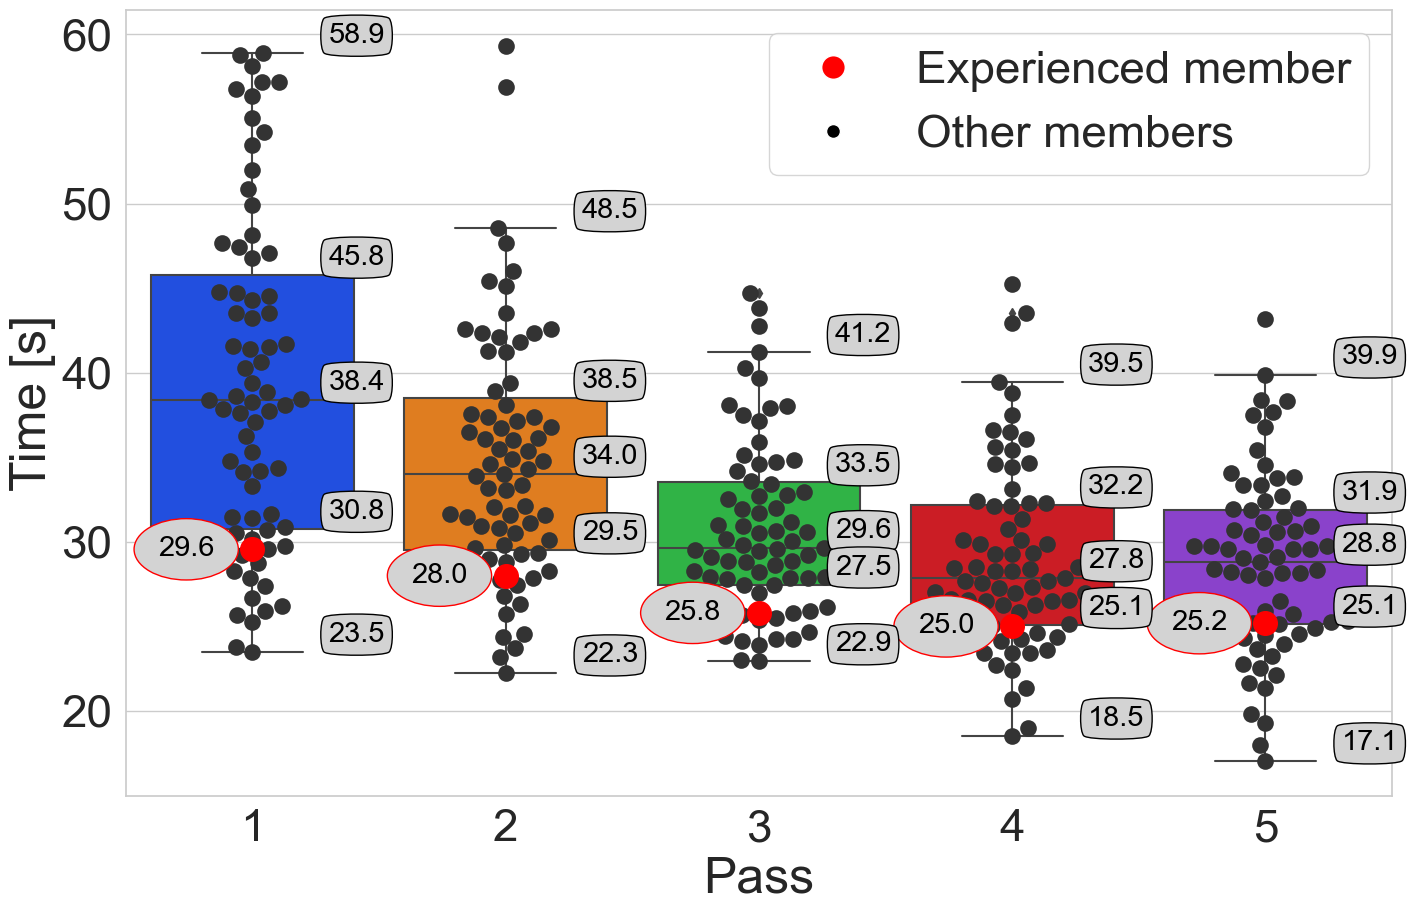

In [21]:
system = 'Point'

sns.set_palette(sns.color_palette('bright'))
sns.set_context('notebook', font_scale=3)
# plt.rcParams['font.size'] = 20
# plt.rc('xtick', labelsize=22)
# plt.rc('ytick', labelsize=24)
# plt.rc('legend', labelsize=22)
plt.rcParams['figure.figsize'] = (15, 10)

dane_system = dane[dane['System']==system]

g=sns.boxplot(data=dane_system, 
            x='Pass', 
            y='Time',
#             color='w'
             )

sns.swarmplot(data=dane_system, 
            x='Pass', 
            y='Time', 
            color='.2',
            size=12,
            ax=g.axes )

sns.swarmplot(data=dane_exper[dane_exper['System']==system], 
               x='Pass', 
               y='Time',
               color='red',
#               facecolor=None,
              edgecolor='r',
              linewidth=1,
              size=17,
               ax=g.axes)

for tick, q in enumerate(dane_exper[dane_exper['System']==system]['Time'].values.tolist()):
        g.text(tick - .15,
               q,
               f'{q:4.1f}', 
               horizontalalignment='right',
               va='center',
               size='xx-small',
               color='black',
               bbox=dict(facecolor='lightgrey', 
                         edgecolor='red',
                        boxstyle='ellipse'))
        
# stats = boxplot_stats(paper[['1','2','3','4','5']].values)
for tick in g.get_xticks():
    stats = boxplot_stats(dane_system[dane_system["Pass"]==tick+1]['Time'].values)
#     print(stats)
    for q in ['whishi', 'q3', 'med', 'q1', 'whislo']:
        g.text(tick + .3,
               stats[0][q] + .6,
               f'{stats[0][q]:4.1f}', 
               horizontalalignment='left',
               size='xx-small',
               color='black',
               bbox=dict(facecolor='lightgrey', 
                         edgecolor='black',
                        boxstyle='round4'))
        

g.set_ylabel('Time [s]', loc='center')
# g.set_title("Pick-by-"+system)
g.legend( handles=[Line2D([0], [0], marker='o', color='w', label='Experienced member',
                          markerfacecolor='r', markersize=17),
                  Line2D([0], [0], marker='o', color='w', label='Other members',
                          markerfacecolor='black', markersize=10)])
plt.tight_layout()

plt.savefig('Experienced_'+system+'.png')


In [22]:
data=pd.concat([paper, light, point])
data=data[['LP', '1','2','3','4','5','Błędy', 'System','Uwagi']].melt(id_vars=['LP','Błędy','Uwagi','System'])
data.rename(columns={'Błędy':'Error', 'Uwagi':'Info', 'variable':'Pass', 'value':'Time'}, 
            inplace=True)
data['Error'] = data['Error'].astype(np.int16)
data['Pass'] = data['Pass'].astype(np.int16)

/tmp/ipykernel_47563/1387206895.py:14: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.swarmplot(data[data['System']==system],


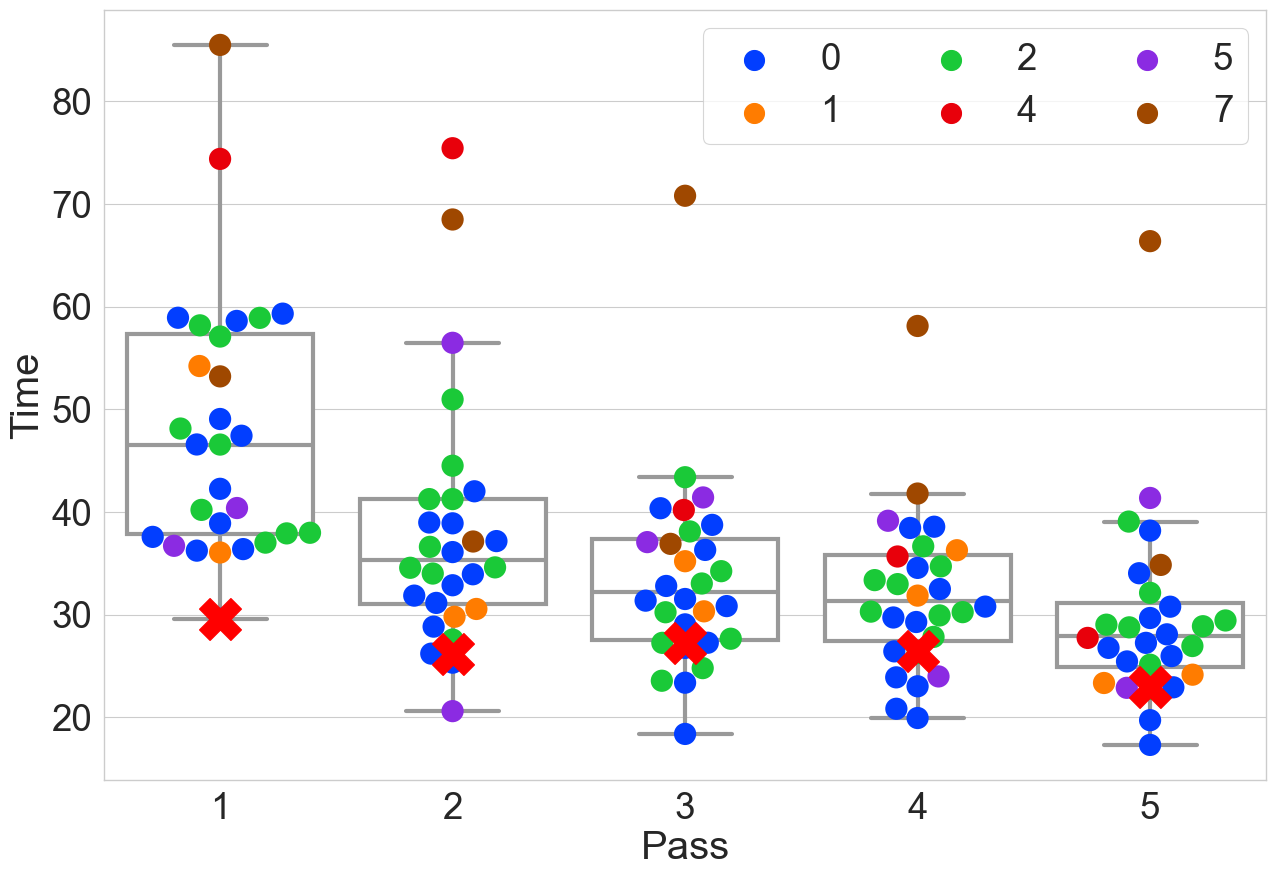

In [23]:
system='Paper'

# g = plt.figure(figsize=(15,10))
sns.set_context('paper',font_scale=3)
g=g=sns.boxplot(data[data['System']==system],
           x='Pass',
           y='Time',
            linewidth=3,
            color='w',
#            height=15,
#            aspect=1.5
             )

sns.swarmplot(data[data['System']==system],
           x='Pass',
           y='Time',
           hue='Error',
           palette=sns.color_palette("bright") ,
           size=16, 
#            height=15,
#            aspect=1.5
             ax=g.axes)
sns.swarmplot(dane_exper[dane_exper['System']==system], 
               x='Pass', 
               y='Time',
              marker='X',
               color='red',
              facecolor=None,
              edgecolor='r',
              linewidth=1,
              size=30,
               ax=g.axes)
plt.legend(markerscale=3, ncols=3)

In [24]:
dane_system.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 495 to 849
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LP      355 non-null    int64  
 1   Time    355 non-null    float64
 2   System  355 non-null    object 
 3   Pass    355 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 13.9+ KB


0   Paper
1   Light
2   Point
0   Paper
1   Light
2   Point
0   Paper
1   Light
2   Point
0   Paper
1   Light
2   Point
0   Paper
1   Light
2   Point


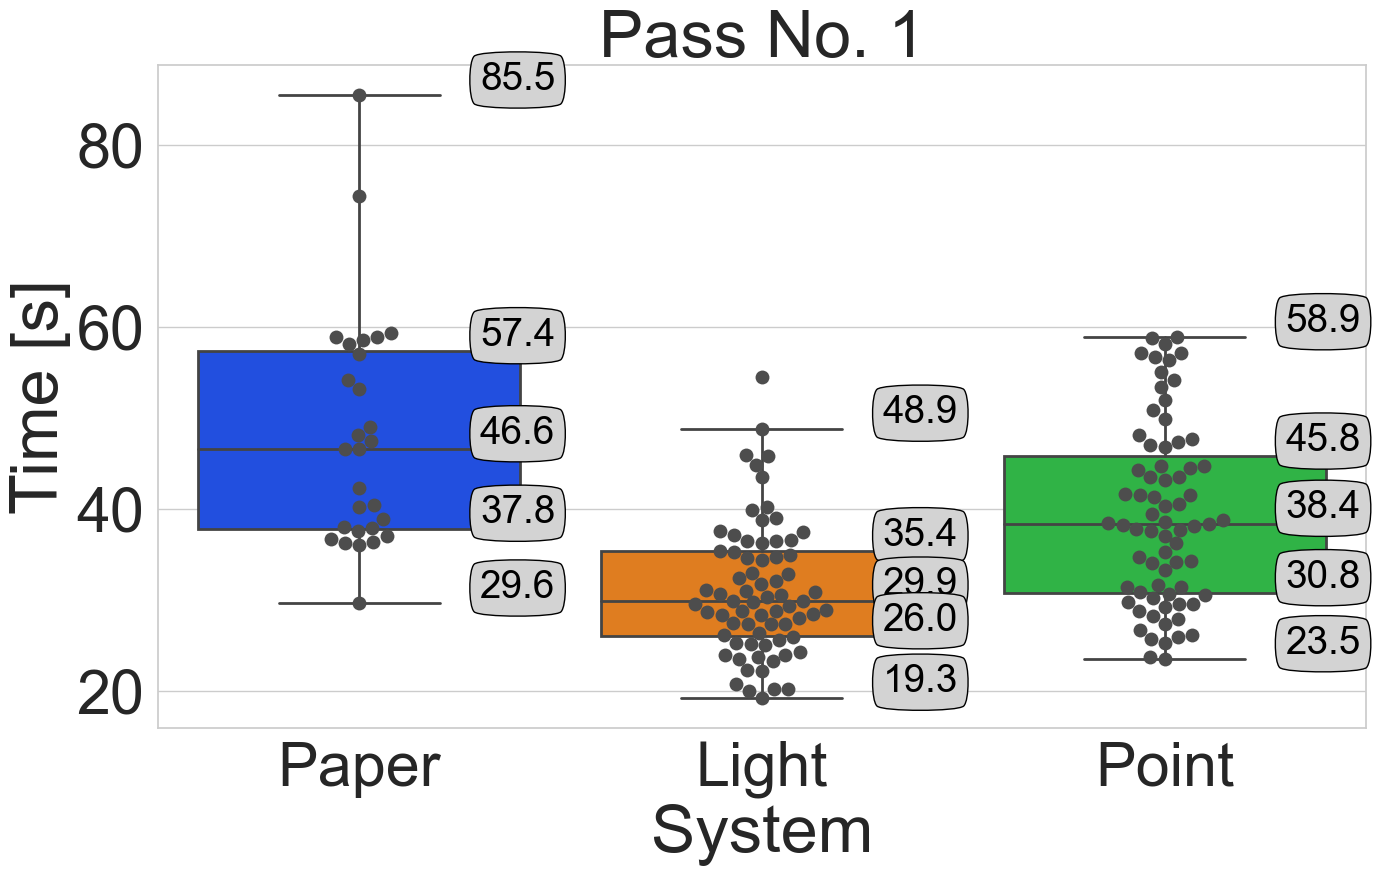

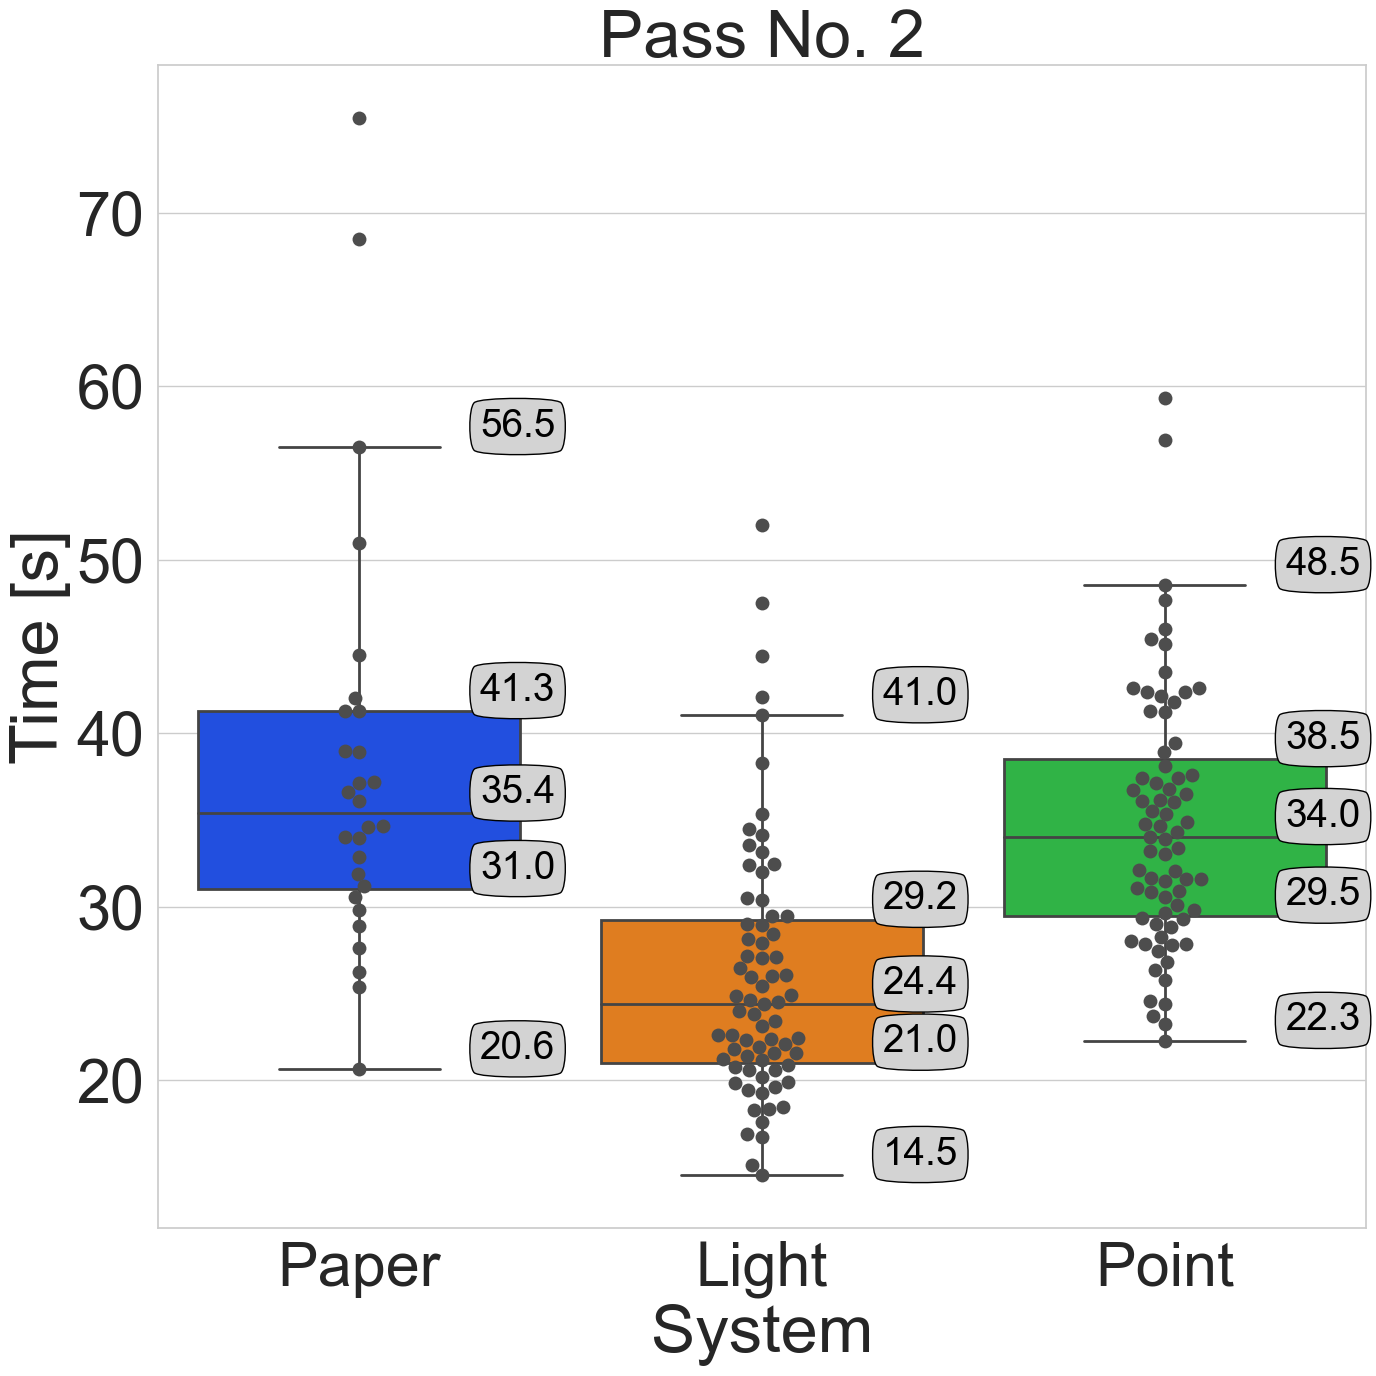

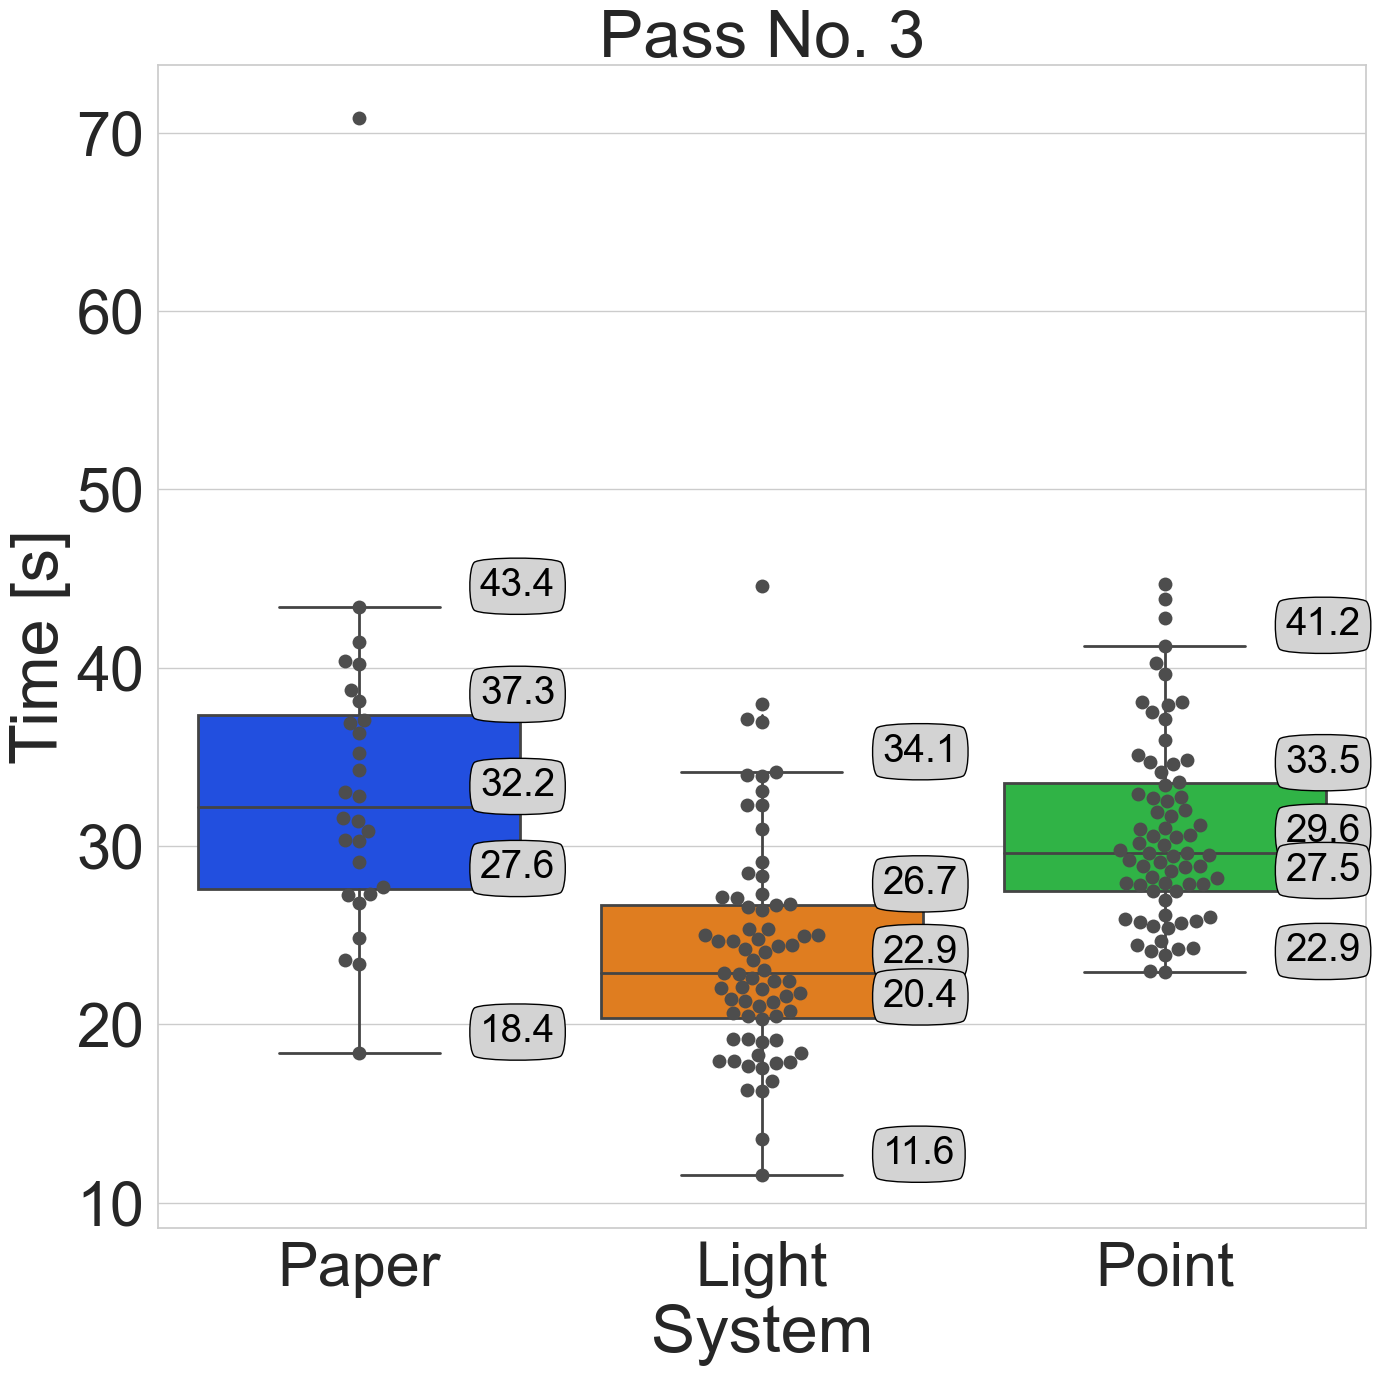

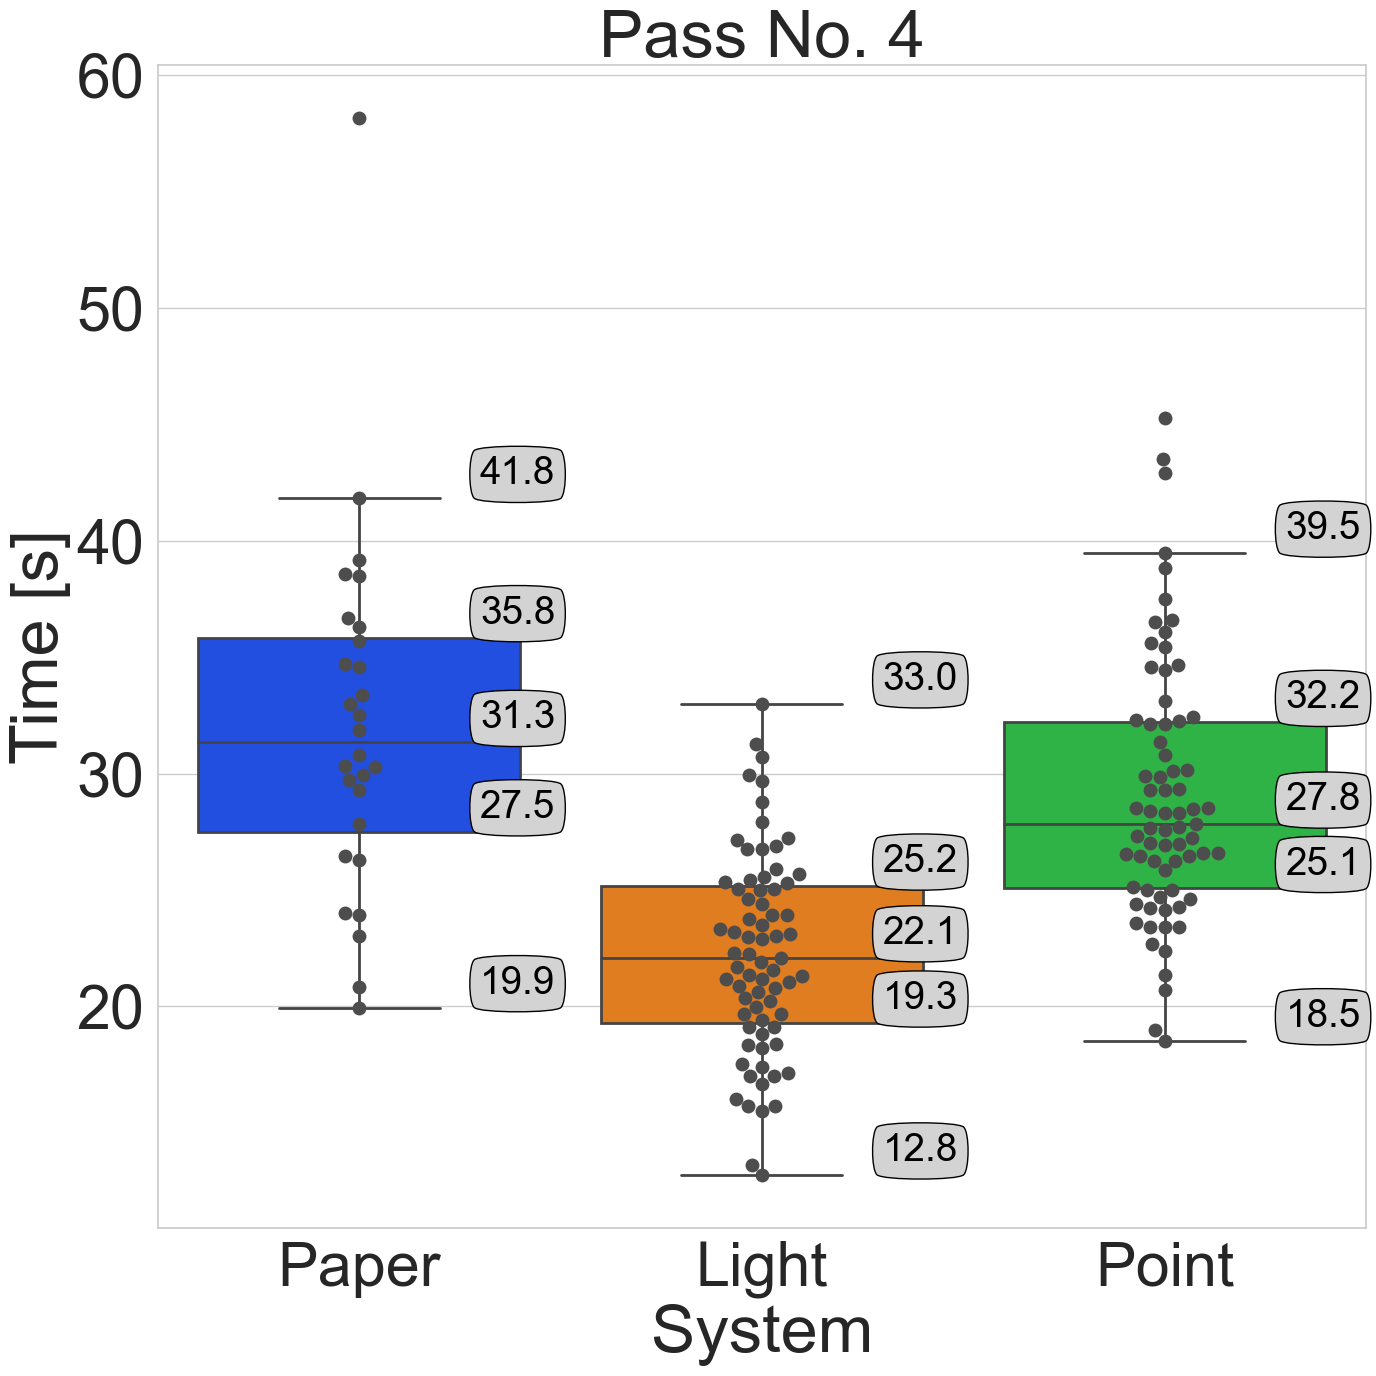

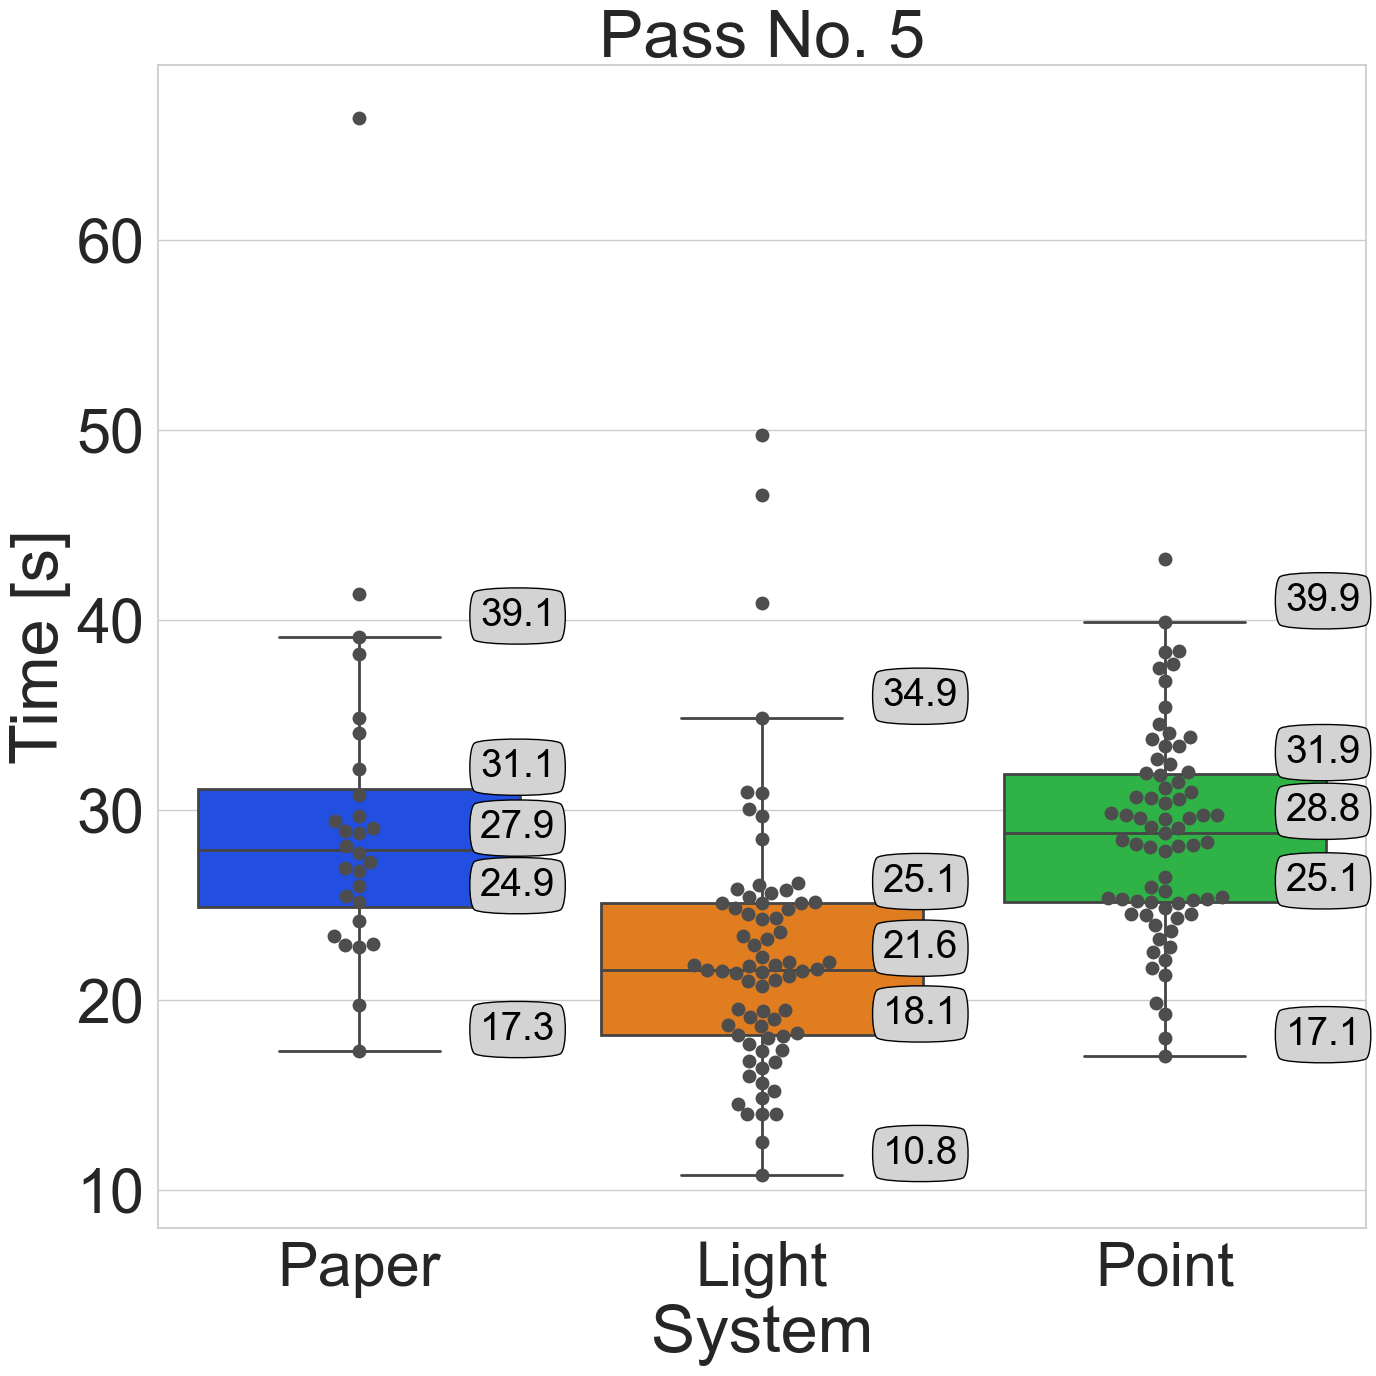

In [25]:
for Pass in [1,2,3,4,5]:
    dane_pass=dane[dane['Pass']==Pass]
    plt.figure(Pass)
    sns.set_style('whitegrid')
    sns.set_context('notebook', font_scale=4)
    plt.rcParams['figure.figsize'] = (15, 15)
    
    g=sns.boxplot(data=dane_pass, 
              x='System',
              y='Time',
#               hue='System'
              linewidth=2);
    sns.swarmplot(data=dane_pass, 
              x='System',
              y='Time',              
              size=10, color='.3', ax=g.axes)
    
    for tick, system in enumerate(['Paper', 'Light', 'Point']):
        stats = boxplot_stats(dane_pass[dane_pass['System']==system]['Time'].values)
        print(tick, " ", system)
        for q in ['whishi', 'q3', 'med', 'q1', 'whislo']:
            g.text(tick + .3,
                   stats[0][q] + .6,
                   f'{stats[0][q]:4.1f}', 
                   horizontalalignment='left',
                   size='xx-small',
                   color='black',
                   bbox=dict(facecolor='lightgrey', 
                         edgecolor='black',
                        boxstyle='round4'))


    g.set_xlabel('System')
    g.set_ylabel('Time [s]')
    g.set_title('Pass No. '+str(Pass))

    plt.tight_layout()

    plt.savefig('pass_'+str(Pass)+'.png')

In [26]:
boxplot_stats(dane_pass[dane_pass['System']=='Paper']['Time'].values)[0]['whishi']

39.08

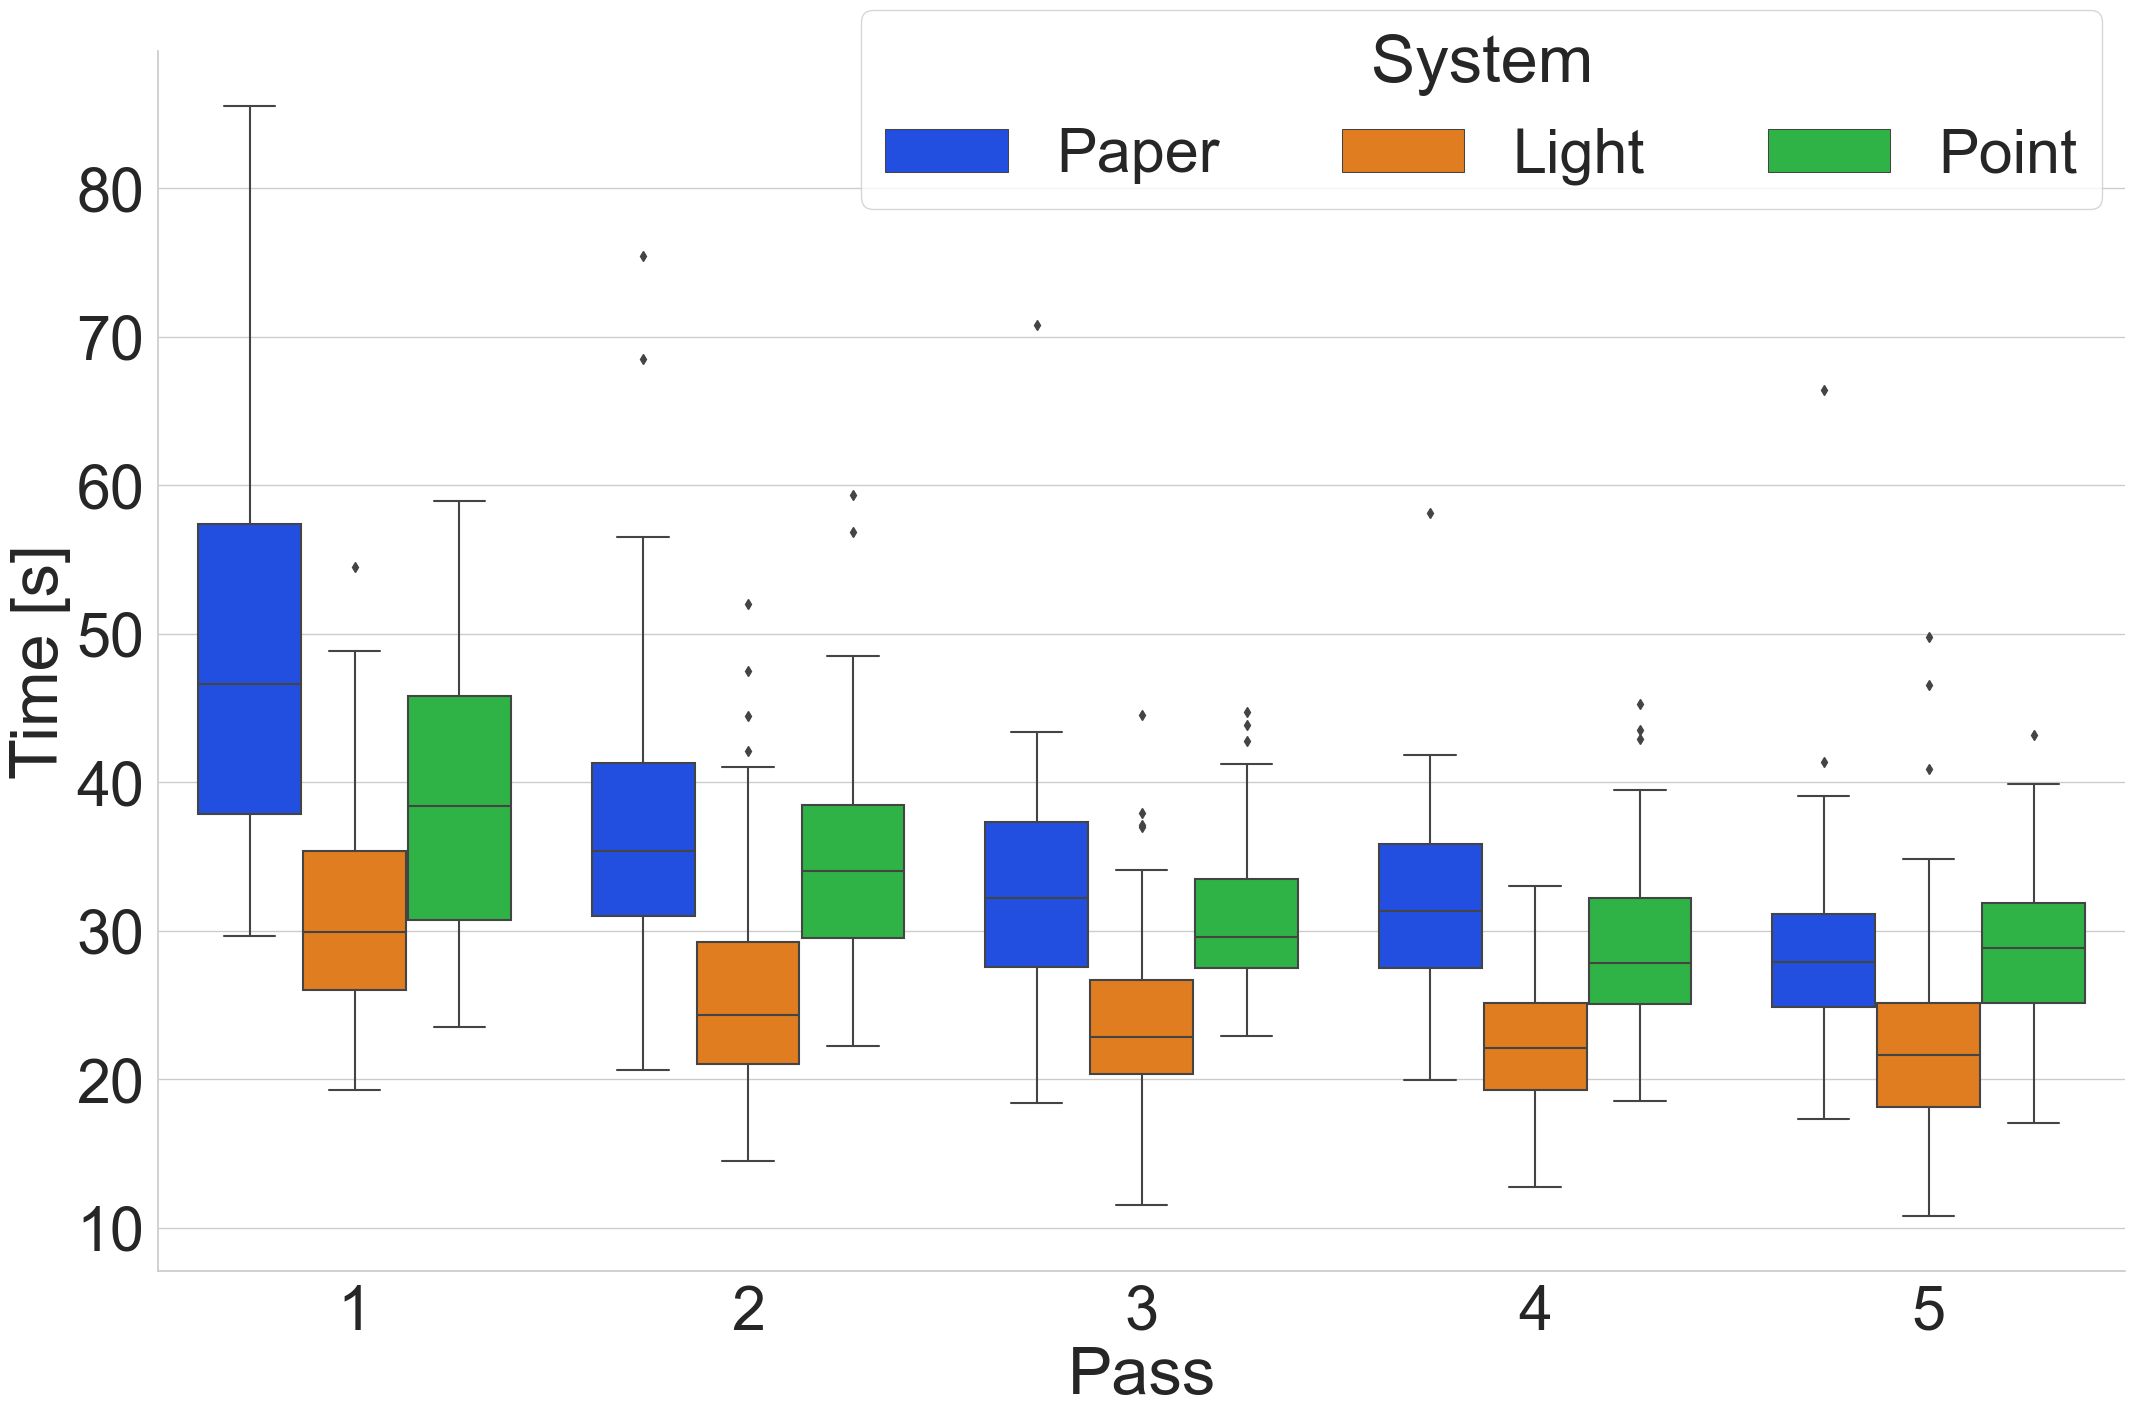

In [27]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=4)
# plt.rcParams['figure.figsize'] = (15, 15)
# plt.rc('xtick', labelsize=42)
# plt.rc('ytick', labelsize=48)

g=sns.catplot(data=dane, 
              x='Pass',
              y='Time',
              hue='System',
              kind='box',
              height=15,
              aspect=1.5
             );
# g.figure figsize=(15,10)
# g.ax.set_xlabel(')
g.ax.set_ylabel('Time [s]')
# g.ax.set_title('All passes and all systems')

sns.move_legend(g, "upper center", ncol=3, frameon=True,
               bbox_to_anchor=(.6, 1))

plt.savefig('all_passes_all_systems.png')

In [28]:
paper['System']='Paper'
light['System']='Light'
point['System']='Point'
dane_cols = pd.concat([paper, light, point], ignore_index=True)
# dane_cols

dane_diff = dane_cols[['1','2','3','4','5']].diff(axis=1)
dane_diff=dane_diff[['2', '3', '4', '5']]
dane_diff['System'] = dane_cols['System']
dane_diff.columns=['2-1','3-2','4-3','5-4','System']
dane_diff['Median'] = dane_diff.apply(lambda x: np.median(x[['2-1','3-2','4-3','5-4']]) , 
                                      axis=1)

dane_diff

2-1    3-2    4-3   5-4 System  Median
0     6.53 -19.71  11.86 -7.22  Paper  -0.345
1    -3.35   8.82 -13.46 -1.16  Paper  -2.255
2   -16.10  20.81 -17.43 -1.11  Paper  -8.605
3   -17.91 -12.76   1.55 -2.62  Paper  -7.690
4    -2.41 -11.04   9.80 -4.49  Paper  -3.450
..     ...    ...    ...   ...    ...     ...
165 -12.77  -0.23  -2.98 -4.08  Point  -3.530
166  -9.85  -3.31  -3.57  2.56  Point  -3.440
167 -12.12  -6.36   3.26 -6.12  Point  -6.240
168  -1.56  -2.20  -0.80  0.19  Point  -1.180
169  -6.37  -0.85  -3.40 -0.36  Point  -2.125

[170 rows x 6 columns]

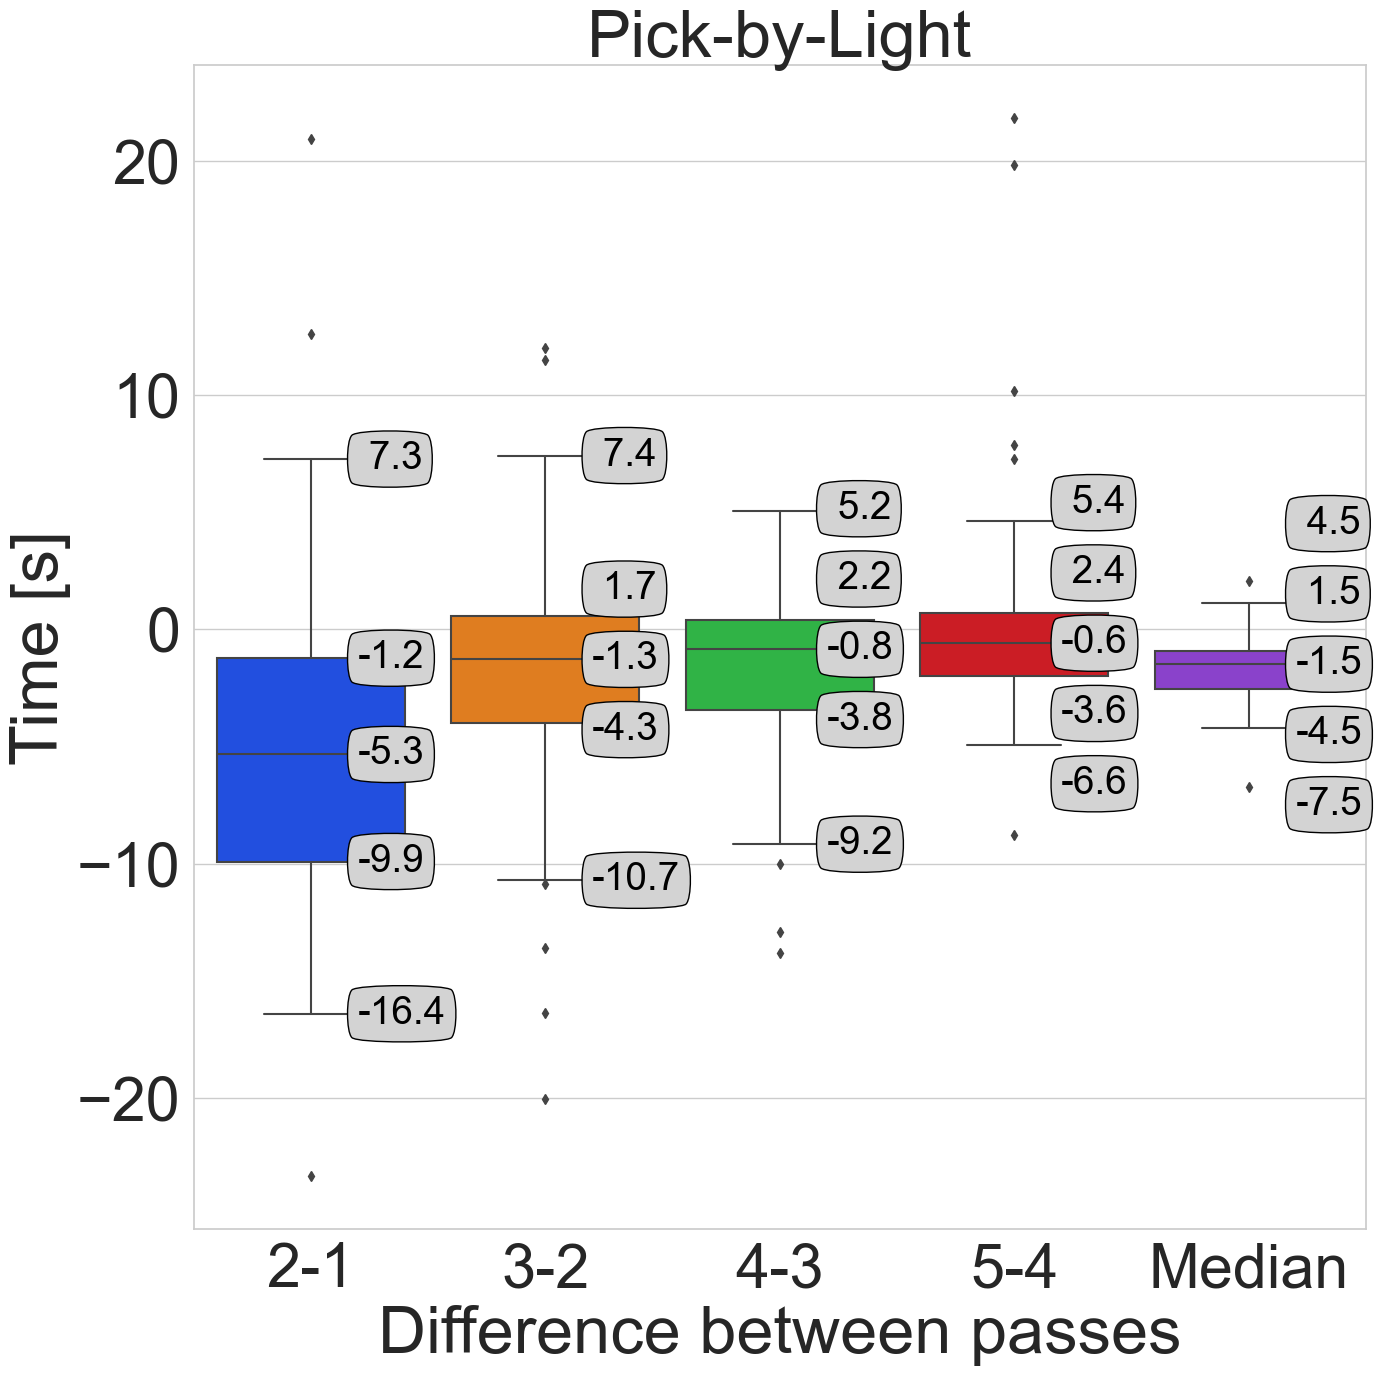

In [29]:
system='Light'

sns.set_context('notebook', font_scale=4)

g=sns.boxplot(dane_diff[dane_diff['System']==system][['2-1','3-2','4-3','5-4','Median']])

stats = boxplot_stats(dane_diff[dane_diff['System']==system][['2-1','3-2','4-3','5-4','Median']].values)
for tick in g.get_xticks():    
    pos = stats[tick]
    if pos['med']-pos['q1'] <= 3:
        pos['q1'] = pos['med']-3
    if pos['q3']-pos['med'] <= 3:
        pos['q3'] = pos['med']+3
    if pos['whishi'] - pos['q3'] <= 3:
        pos['whishi']=pos['q3']+3
    if pos['q1']-pos['whislo'] <= 3:
        pos['whislo']=pos['q1']-3
    for q in ['whishi', 'q3', 'med', 'q1', 'whislo']:
        g.text(tick + .2,
               pos[q],
               f'{stats[tick][q]:4.1f}', 
               horizontalalignment='left',
               va='center',
               size='xx-small',
               color='black',
               bbox=dict(facecolor='lightgrey', 
                         edgecolor='black',
                        boxstyle='round4'))


g.set_ylabel('Time [s]')
g.set_xlabel('Difference between passes')
# g.set_title('Time differences between following passes')
g.set_title('Pick-by-'+system)

plt.tight_layout()

plt.savefig('diff_'+system+'.png')

In [30]:
dane_diff_l = dane_diff.melt(id_vars=['System'])

In [31]:
dane_diff_l

System variable   value
0    Paper      2-1   6.530
1    Paper      2-1  -3.350
2    Paper      2-1 -16.100
3    Paper      2-1 -17.910
4    Paper      2-1  -2.410
..     ...      ...     ...
845  Point   Median  -3.530
846  Point   Median  -3.440
847  Point   Median  -6.240
848  Point   Median  -1.180
849  Point   Median  -2.125

[850 rows x 3 columns]

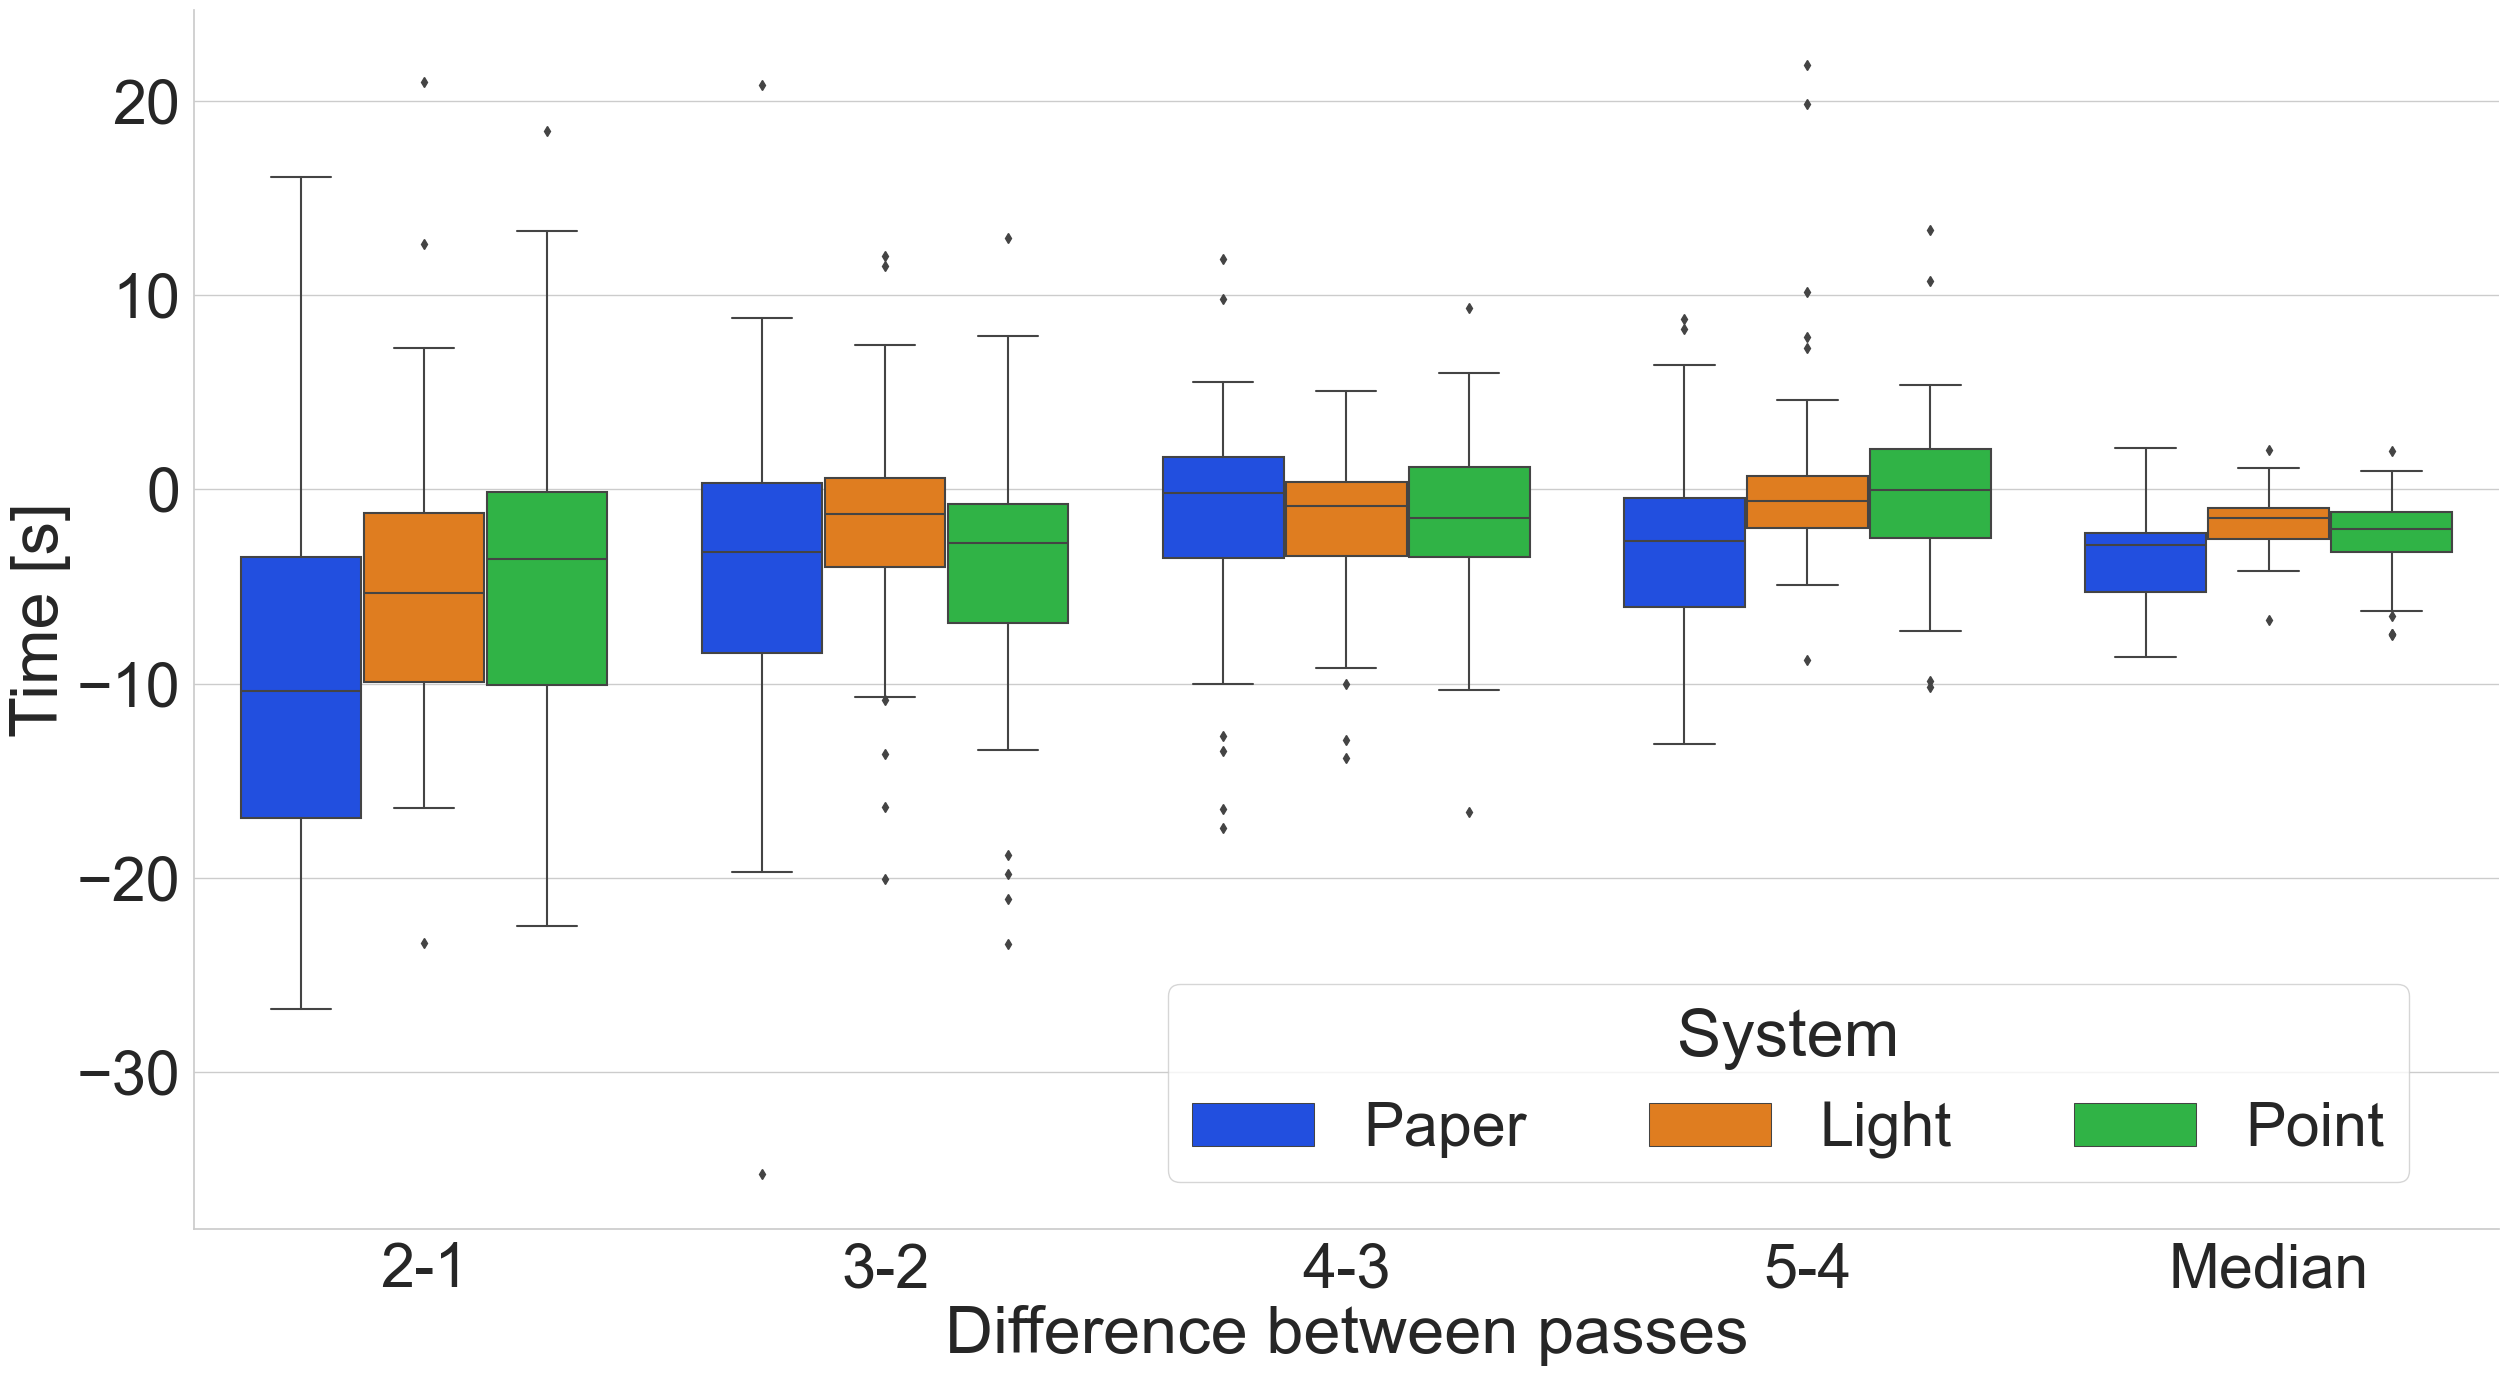

In [32]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=4)

# plt.rc('xtick', labelsize=42)
# plt.rc('ytick', labelsize=48)
# plt.rc('axes', labelsize=68)

g=sns.catplot(dane_diff_l, 
            x='variable', 
            y='value', 
            hue='System',
            kind='box',
            height=15,
            aspect=1.5
           )
g.ax.set_ylabel('Time [s]', )
g.ax.set_xlabel('Difference between passes')
# g.set_title('Time differences between following passes')
sns.move_legend(g, 'lower right', 
                title='System', 
                ncol=3, 
                frameon=True,
               bbox_to_anchor=(.95, .15))

plt.tight_layout()

plt.savefig("diff_all.png")

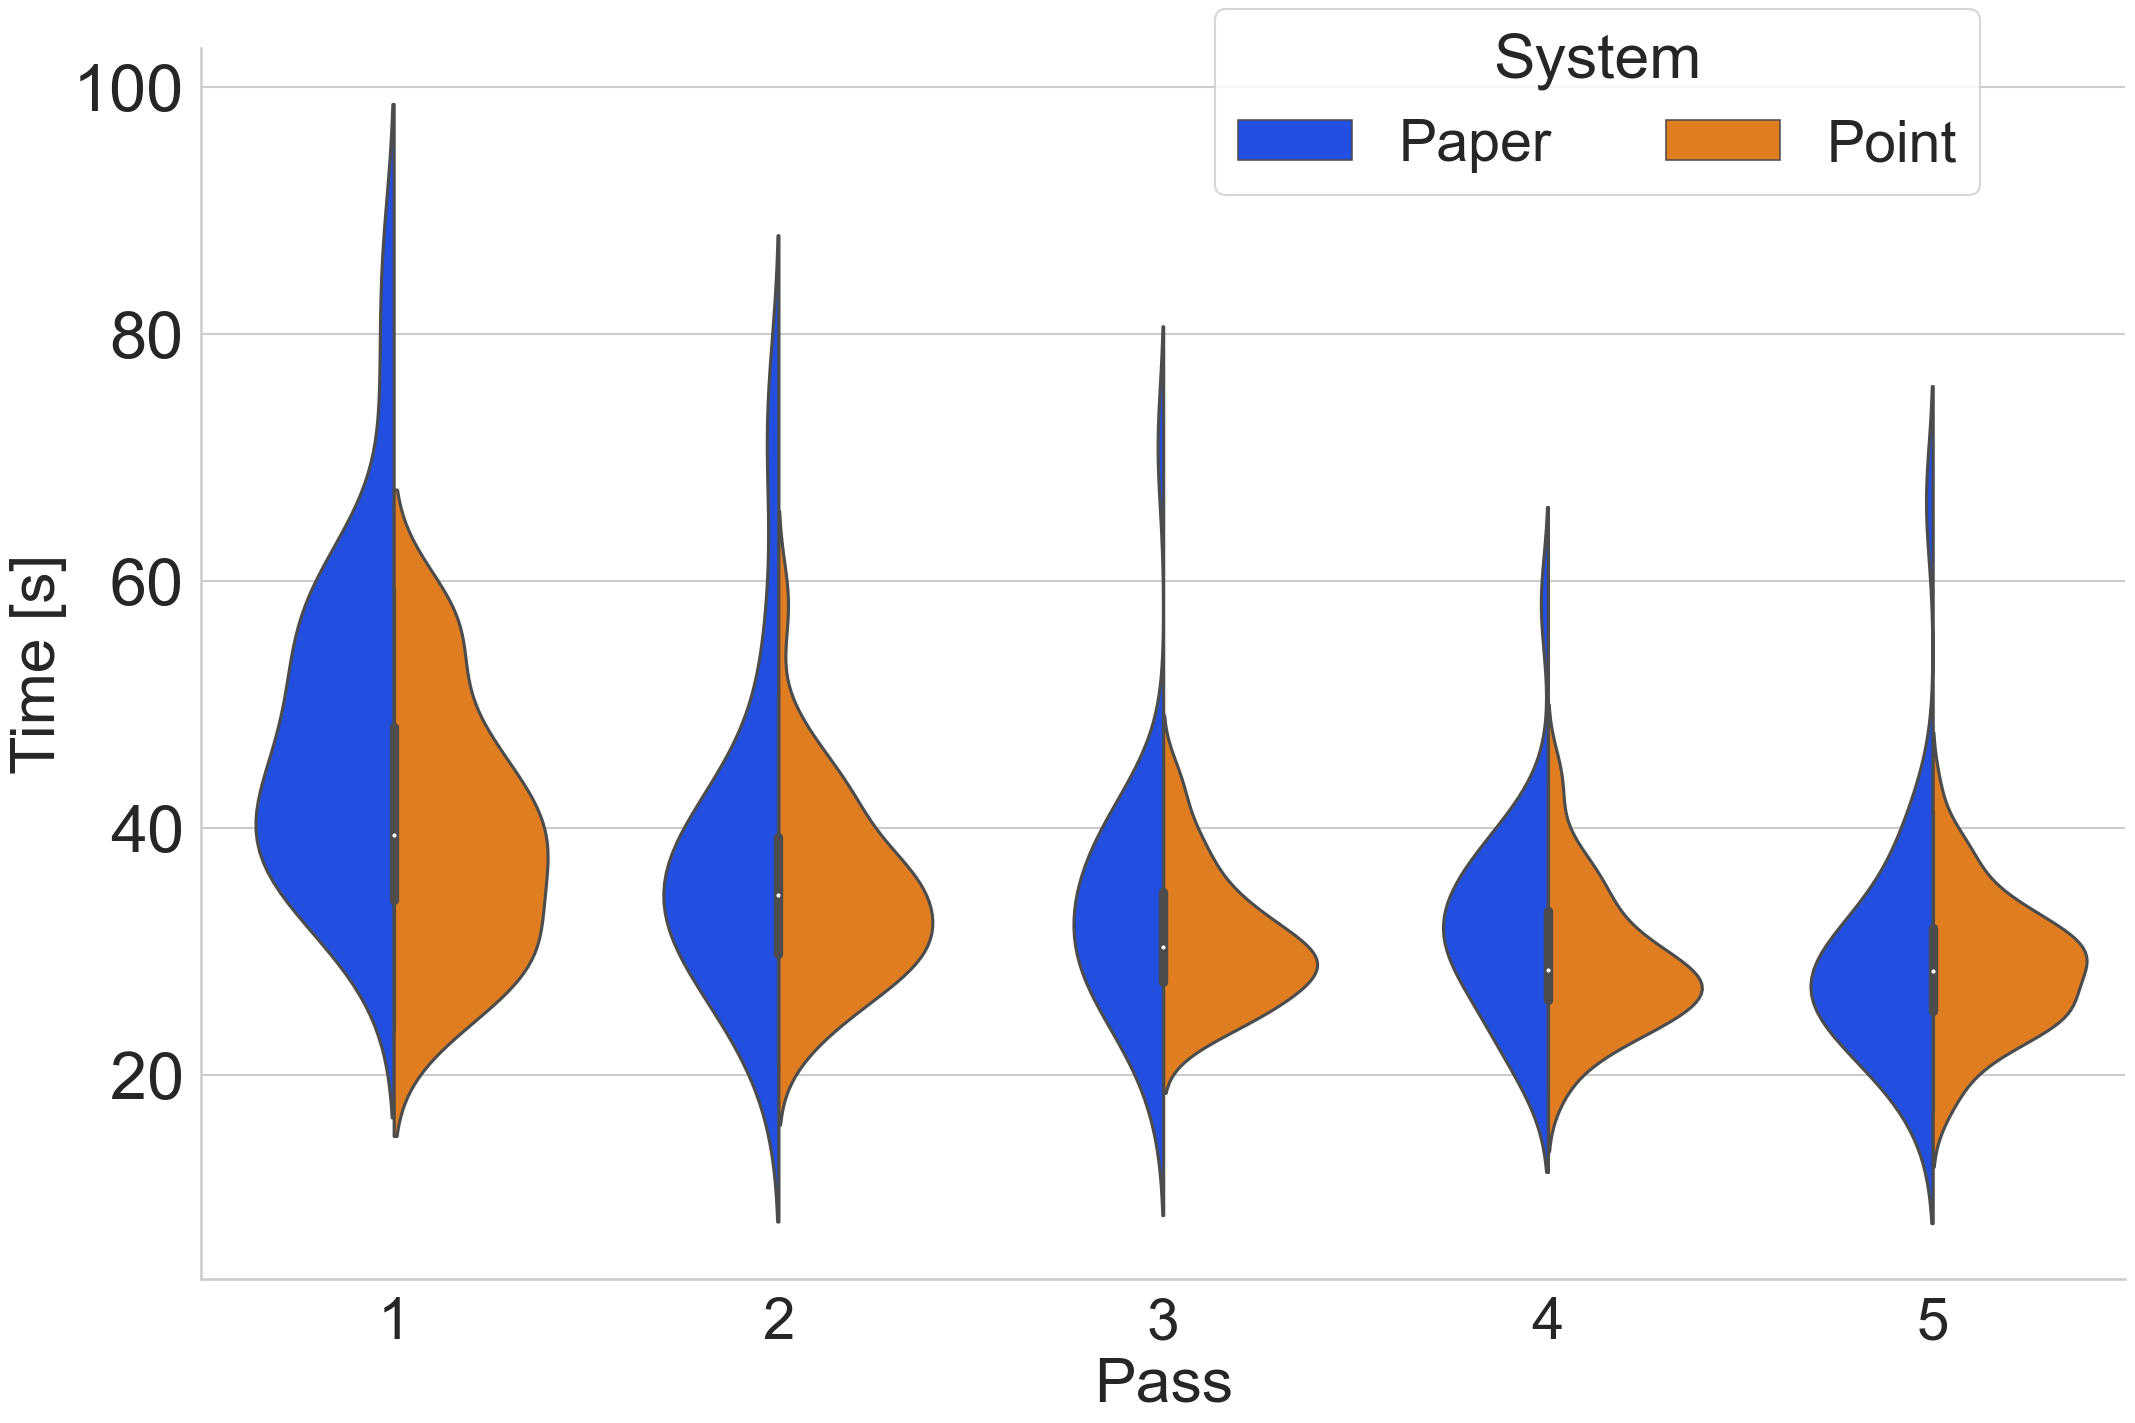

In [33]:
dane_pp=dane[dane['System'].isin(['Paper','Point'])]

sns.set_context('talk', font_scale=2.5)

plt.rc('xtick', labelsize=42)
plt.rc('ytick', labelsize=48)
# plt.rc('axes', labelsize=48)

g=sns.catplot(data=dane_pp,
           x='Pass',
           y='Time',
           hue='System',
           kind='violin',
           split=True,
           height=15,
           aspect=1.5)
g.ax.set_ylabel('Time [s]')
sns.move_legend(g, 'upper center', bbox_to_anchor=(.65, 1), ncol=3, frameon=True)

plt.savefig('comp_prp_violin.png')

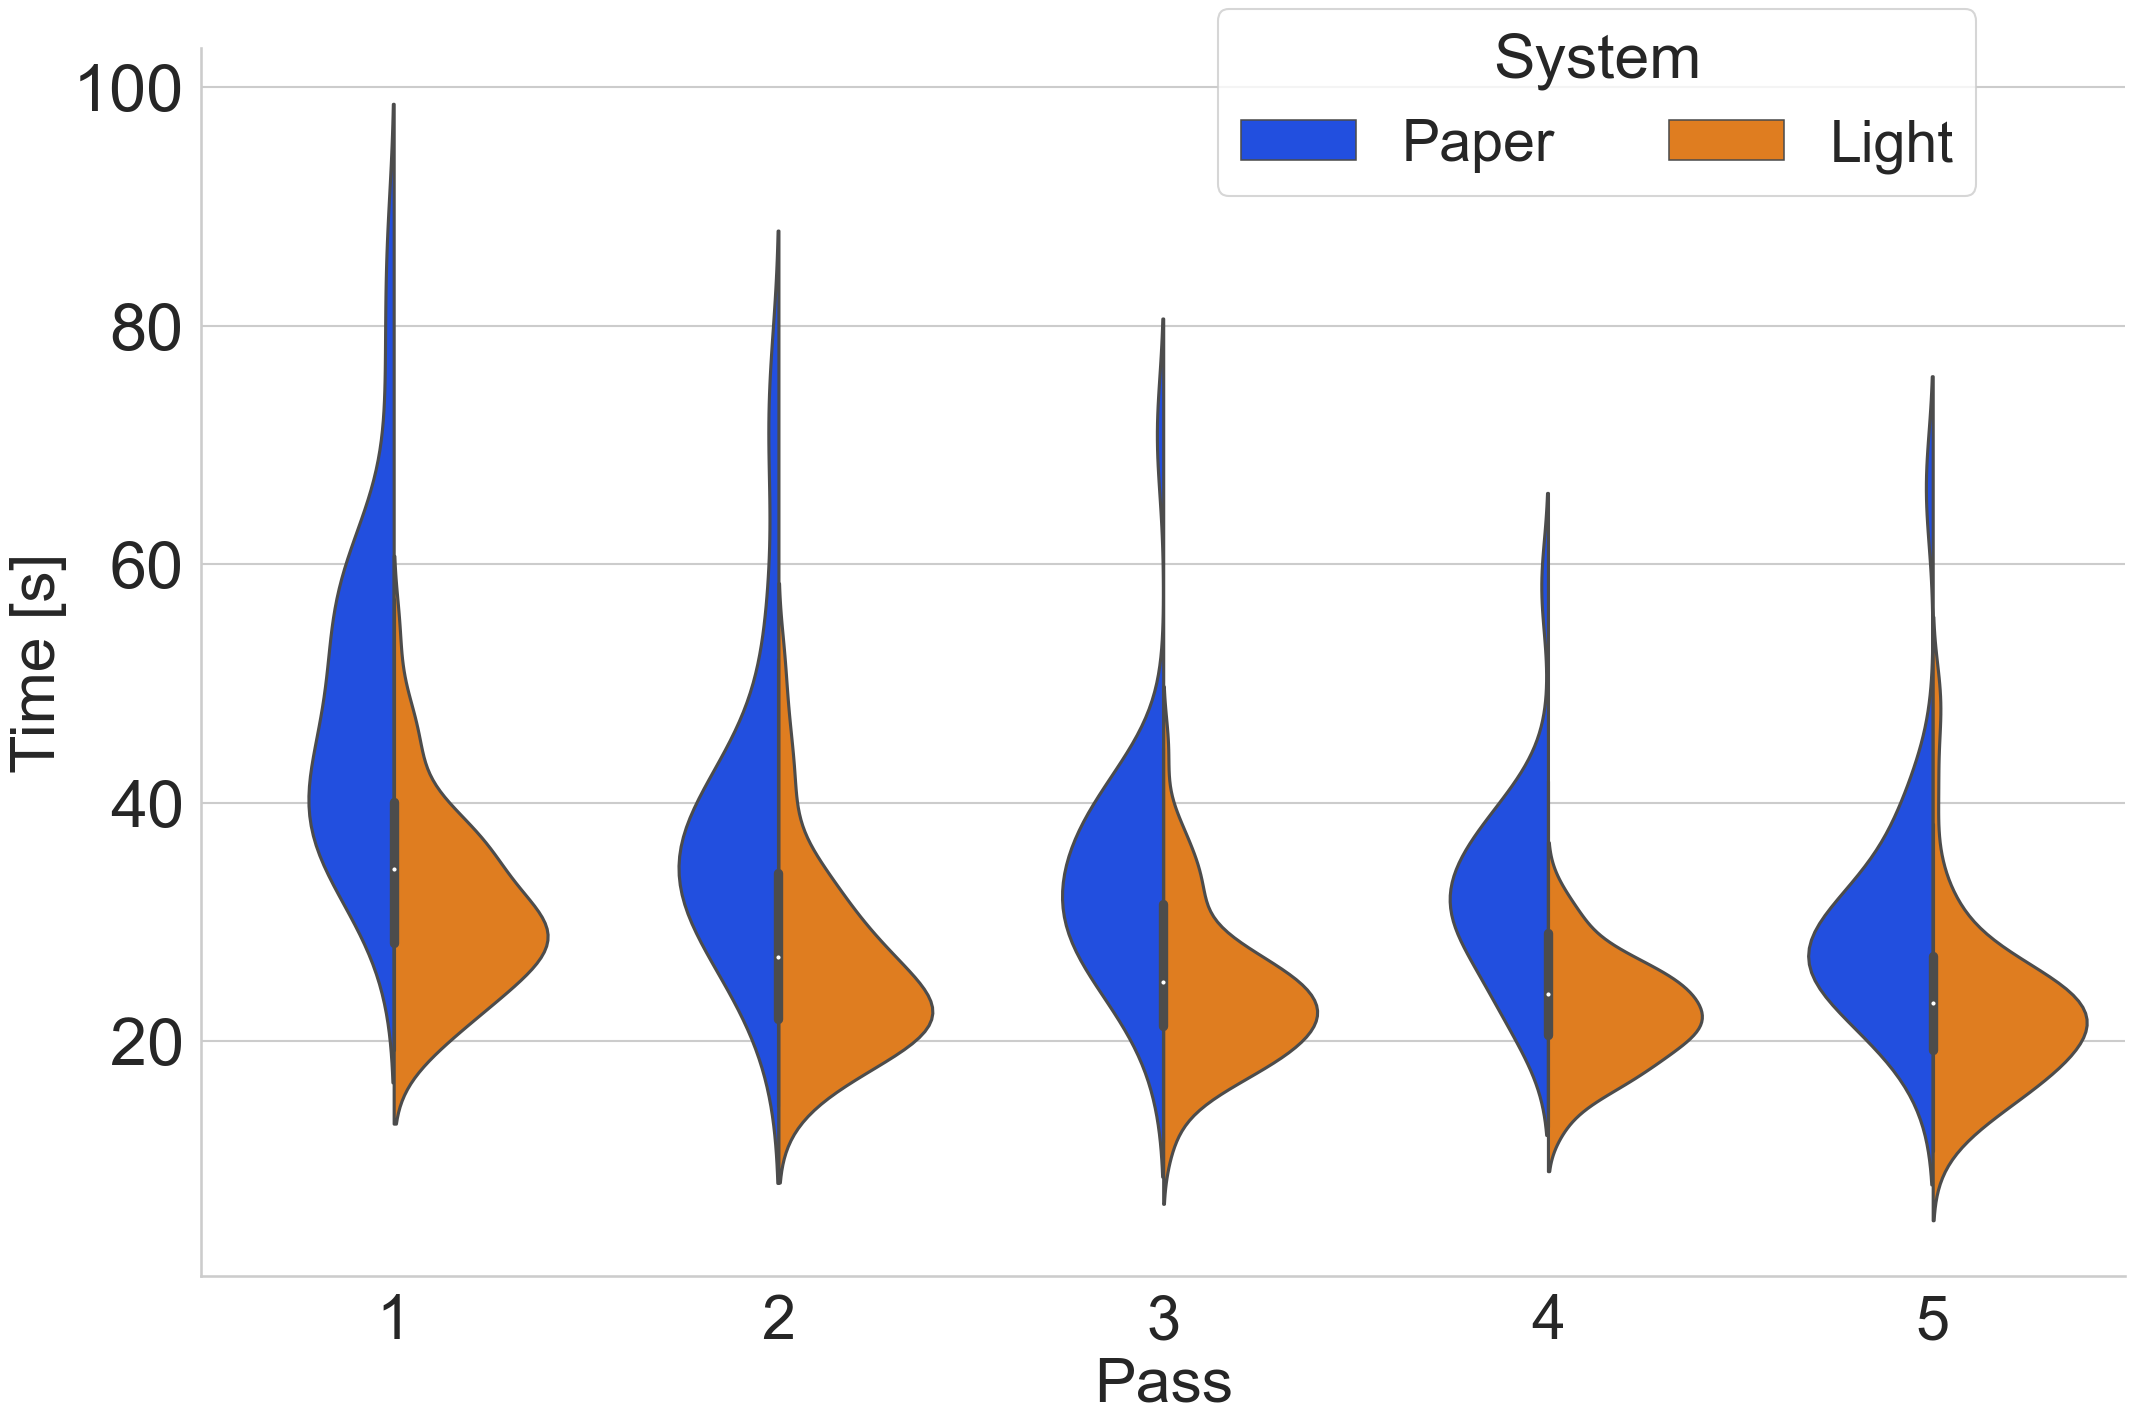

In [34]:
dane_pp=dane[dane['System'].isin(['Paper','Light'])]

sns.set_context('talk', font_scale=2.5)

plt.rc('xtick', labelsize=44)
plt.rc('ytick', labelsize=48)
# plt.rc('axes', labelsize=22)

g=sns.catplot(data=dane_pp,
           x='Pass',
           y='Time',
           hue='System',
           kind='violin',
           split=True,
           height=15,
           aspect=1.5)
g.ax.set_ylabel('Time [s]')
sns.move_legend(g, 'upper center', bbox_to_anchor=(.65, 1), ncol=3, frameon=True)


plt.savefig('comp_prl_violin.png')

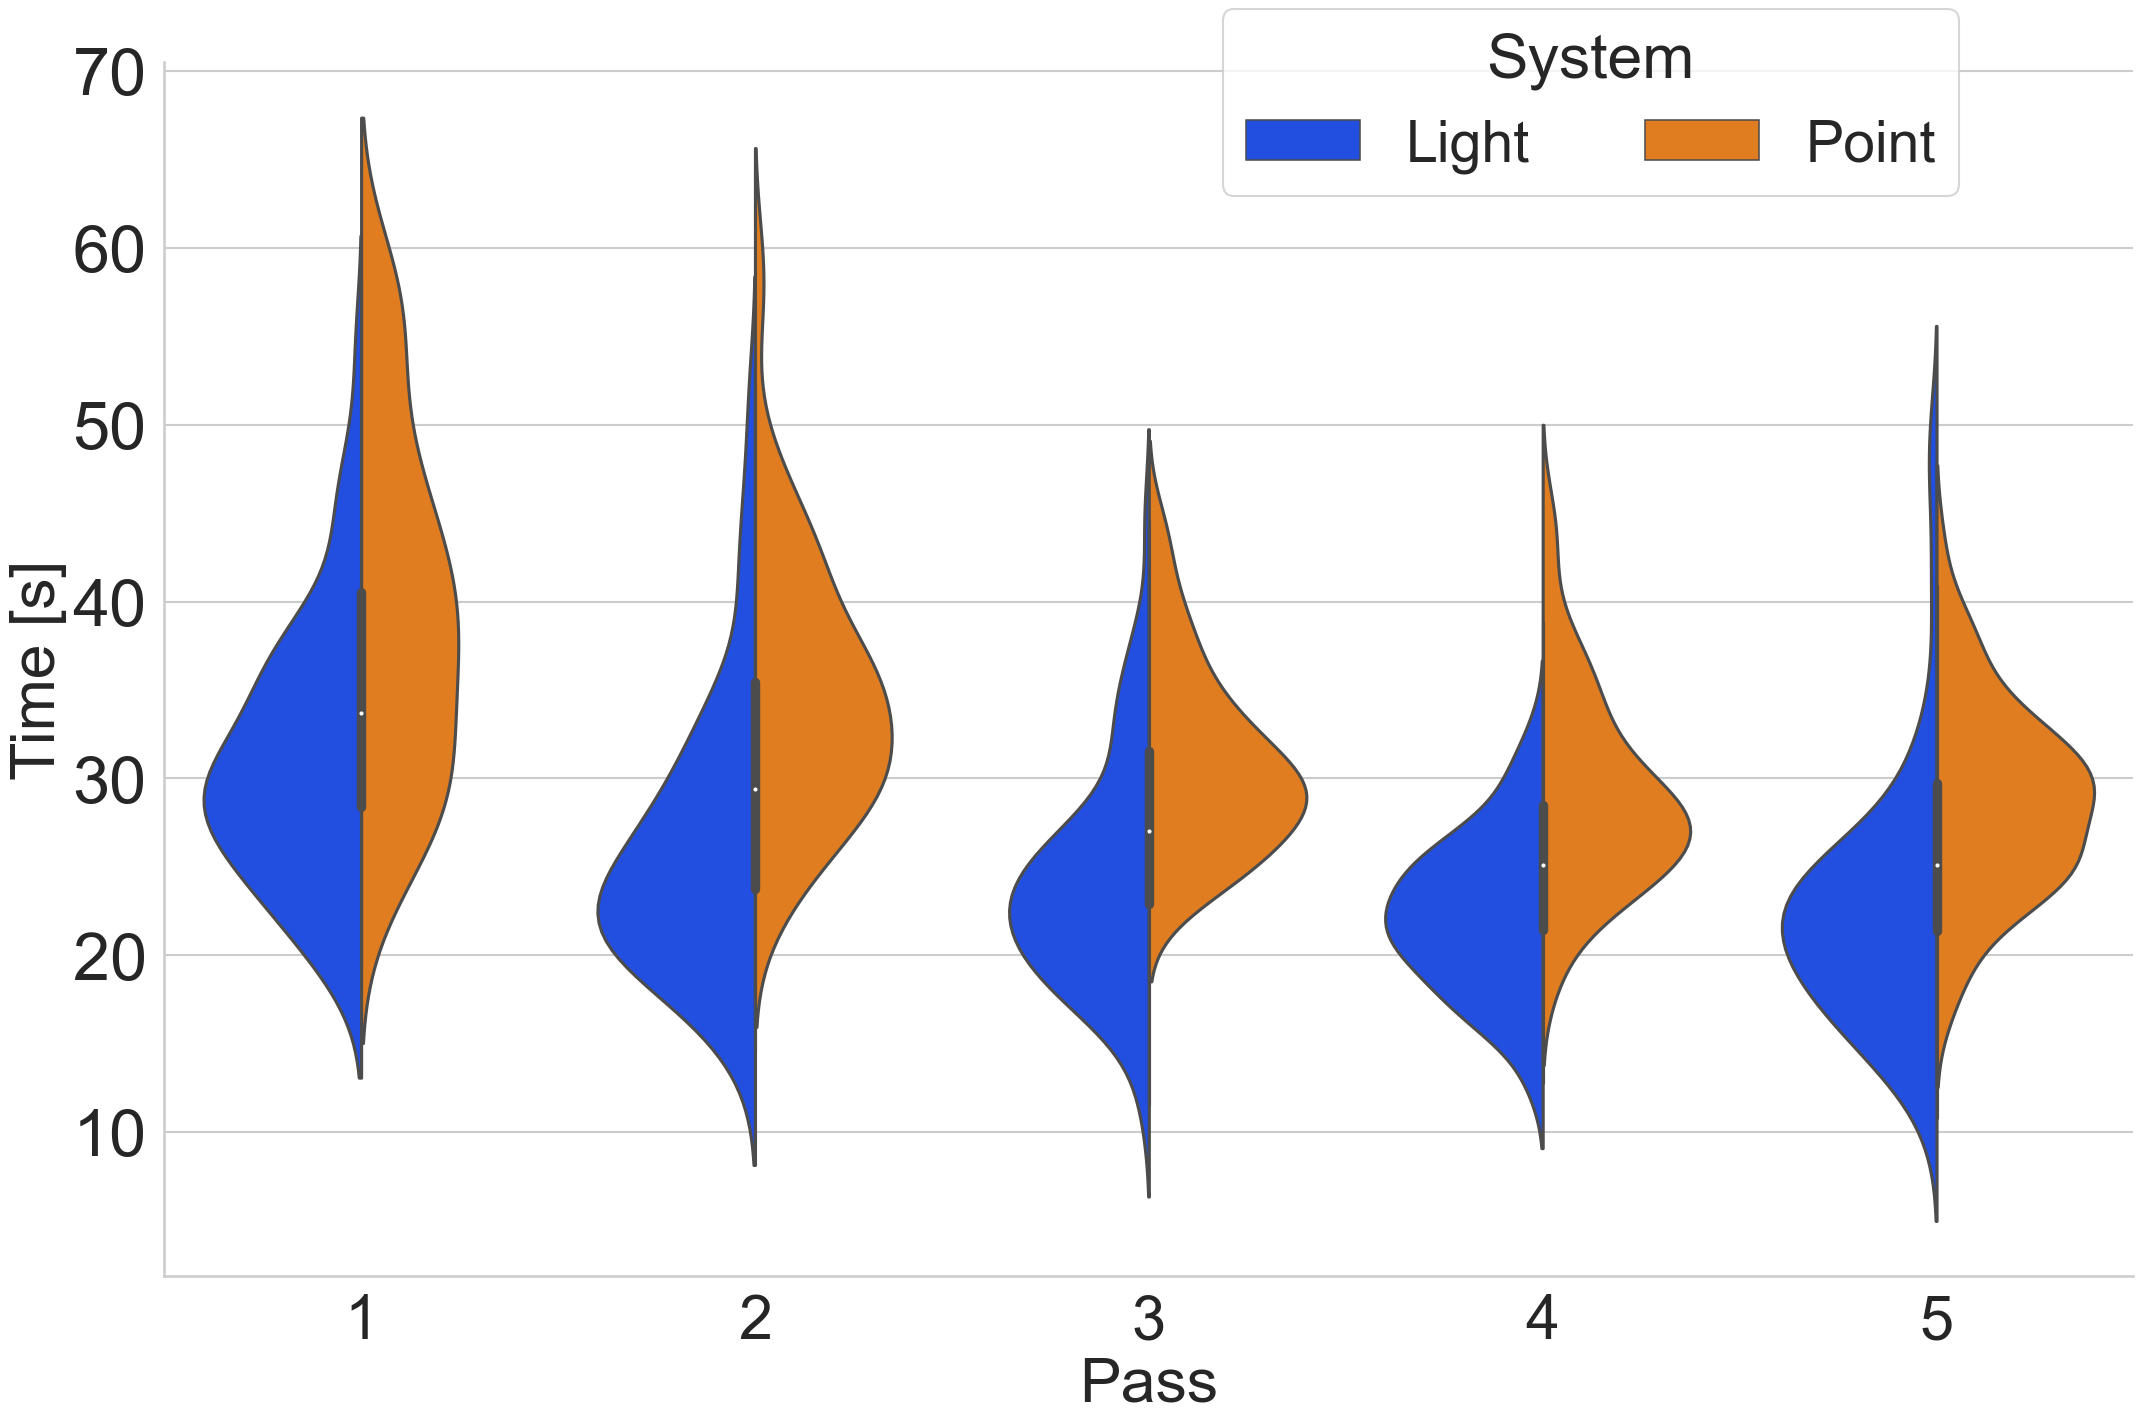

In [35]:
dane_pp=dane[dane['System'].isin(['Light','Point'])]

sns.set_context('talk', font_scale=2.5)

plt.rc('xtick', labelsize=44)
plt.rc('ytick', labelsize=48)
# plt.rc('axes', labelsize=22)

g=sns.catplot(data=dane_pp,
           x='Pass',
           y='Time',
           hue='System',
           kind='violin',
           split=True,
           height=15,
           aspect=1.5)
g.ax.set_ylabel('Time [s]')
sns.move_legend(g, 'upper center', bbox_to_anchor=(.65, 1), ncol=3, frameon=True)

plt.savefig('comp_lp_violin.png')

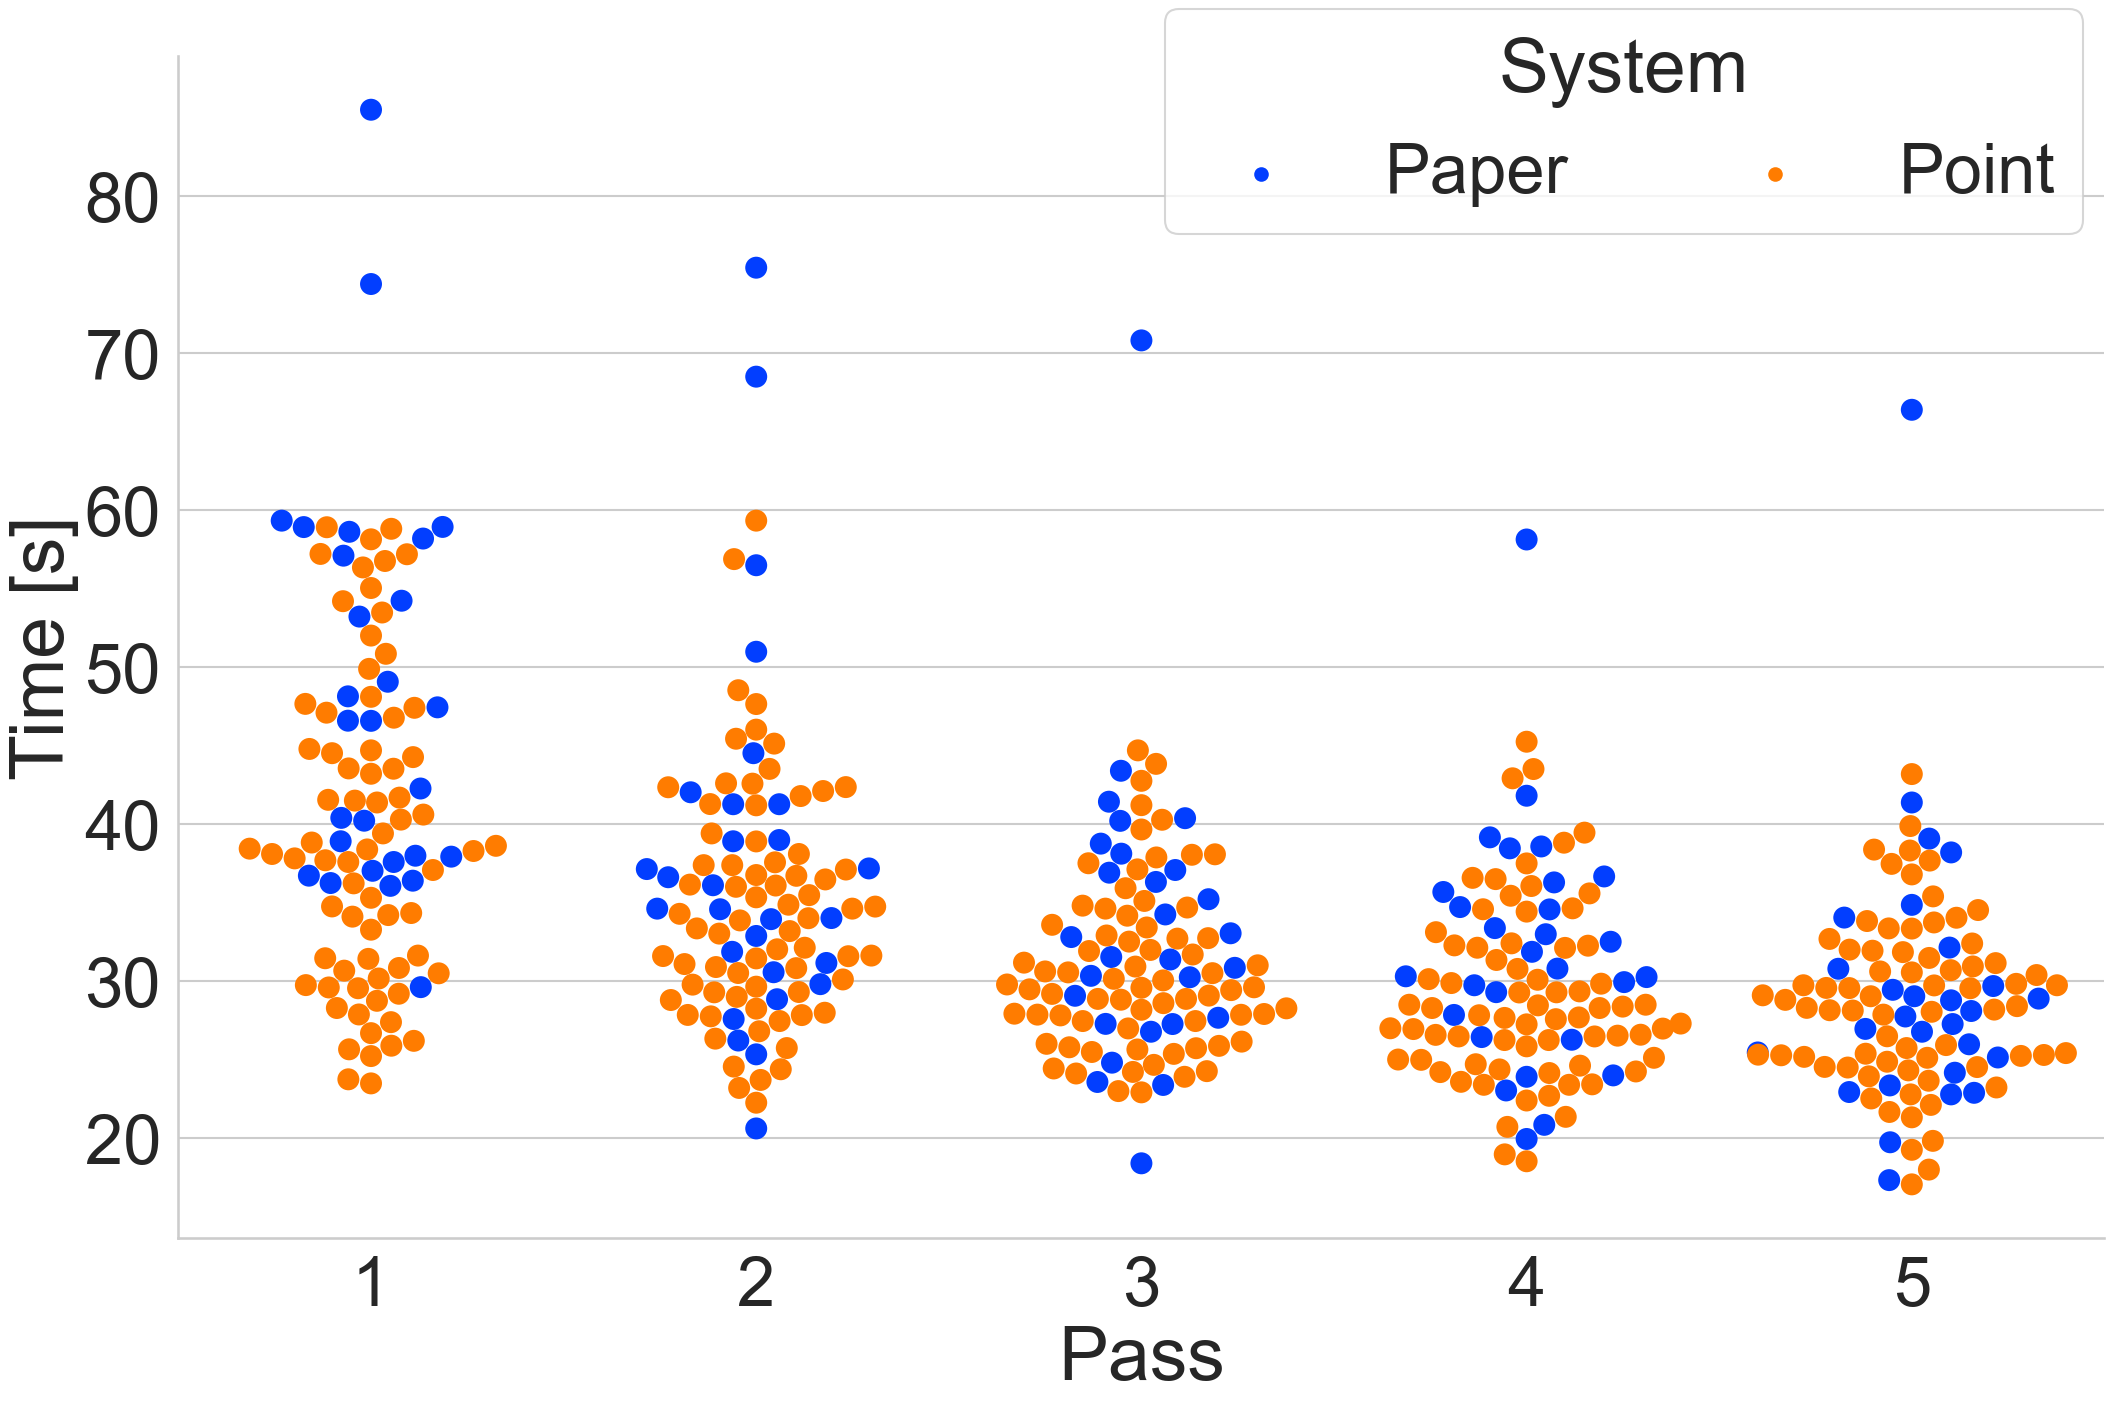

In [36]:
dane_pp=dane[dane['System'].isin(['Paper','Point'])]

sns.set_context('talk', font_scale=3)

# plt.rc('xtick', labelsize=44)
# plt.rc('ytick', labelsize=48)

g=sns.catplot(data=dane_pp,
           x='Pass',
           y='Time',
           hue='System',
           kind='swarm',
            s=250,
           height=15,
           aspect=1.5)
g.ax.set_ylabel('Time [s]')

sns.move_legend(g, 'upper center', bbox_to_anchor=(.65, 1), ncol=3, frameon=True)

plt.savefig('comp_prp_swarm.png')

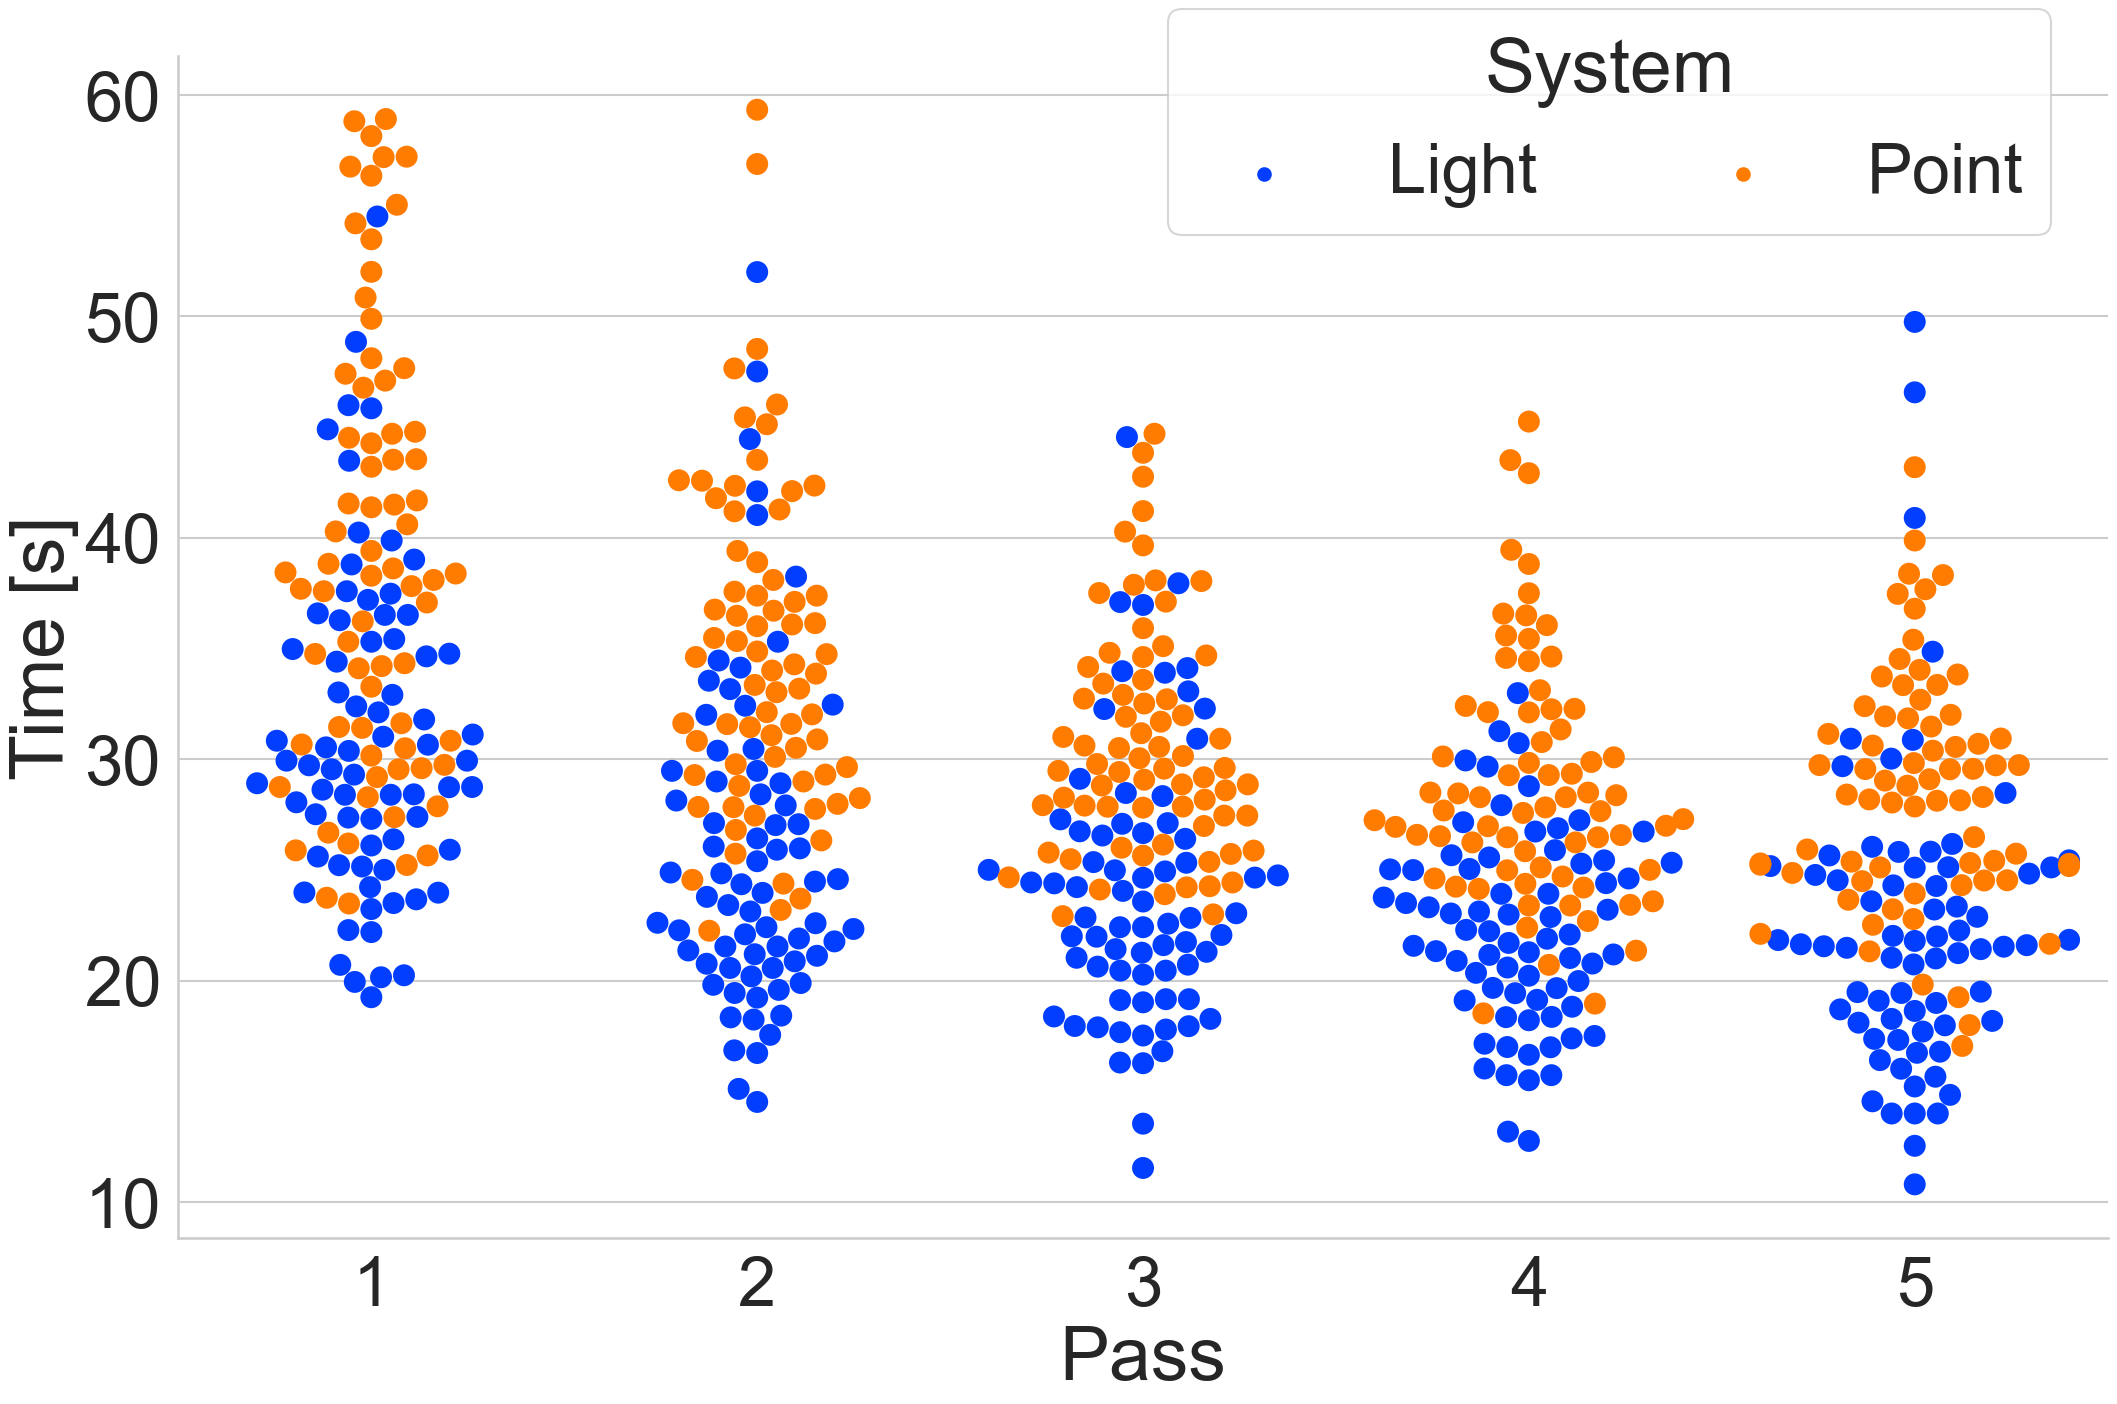

In [37]:
dane_pp=dane[dane['System'].isin(['Light','Point'])]

sns.set_context('talk', font_scale=3)

# plt.rc('xtick', labelsize=44)
# plt.rc('ytick', labelsize=48)

g=sns.catplot(data=dane_pp,
           x='Pass',
           y='Time',
           hue='System',
           kind='swarm',
            s=250,
           height=15,
           aspect=1.5)
g.ax.set_ylabel('Time [s]')
sns.move_legend(g, 'upper center', bbox_to_anchor=(.65, 1), ncol=3, frameon=True)


plt.savefig('comp_lp_swarm.png')

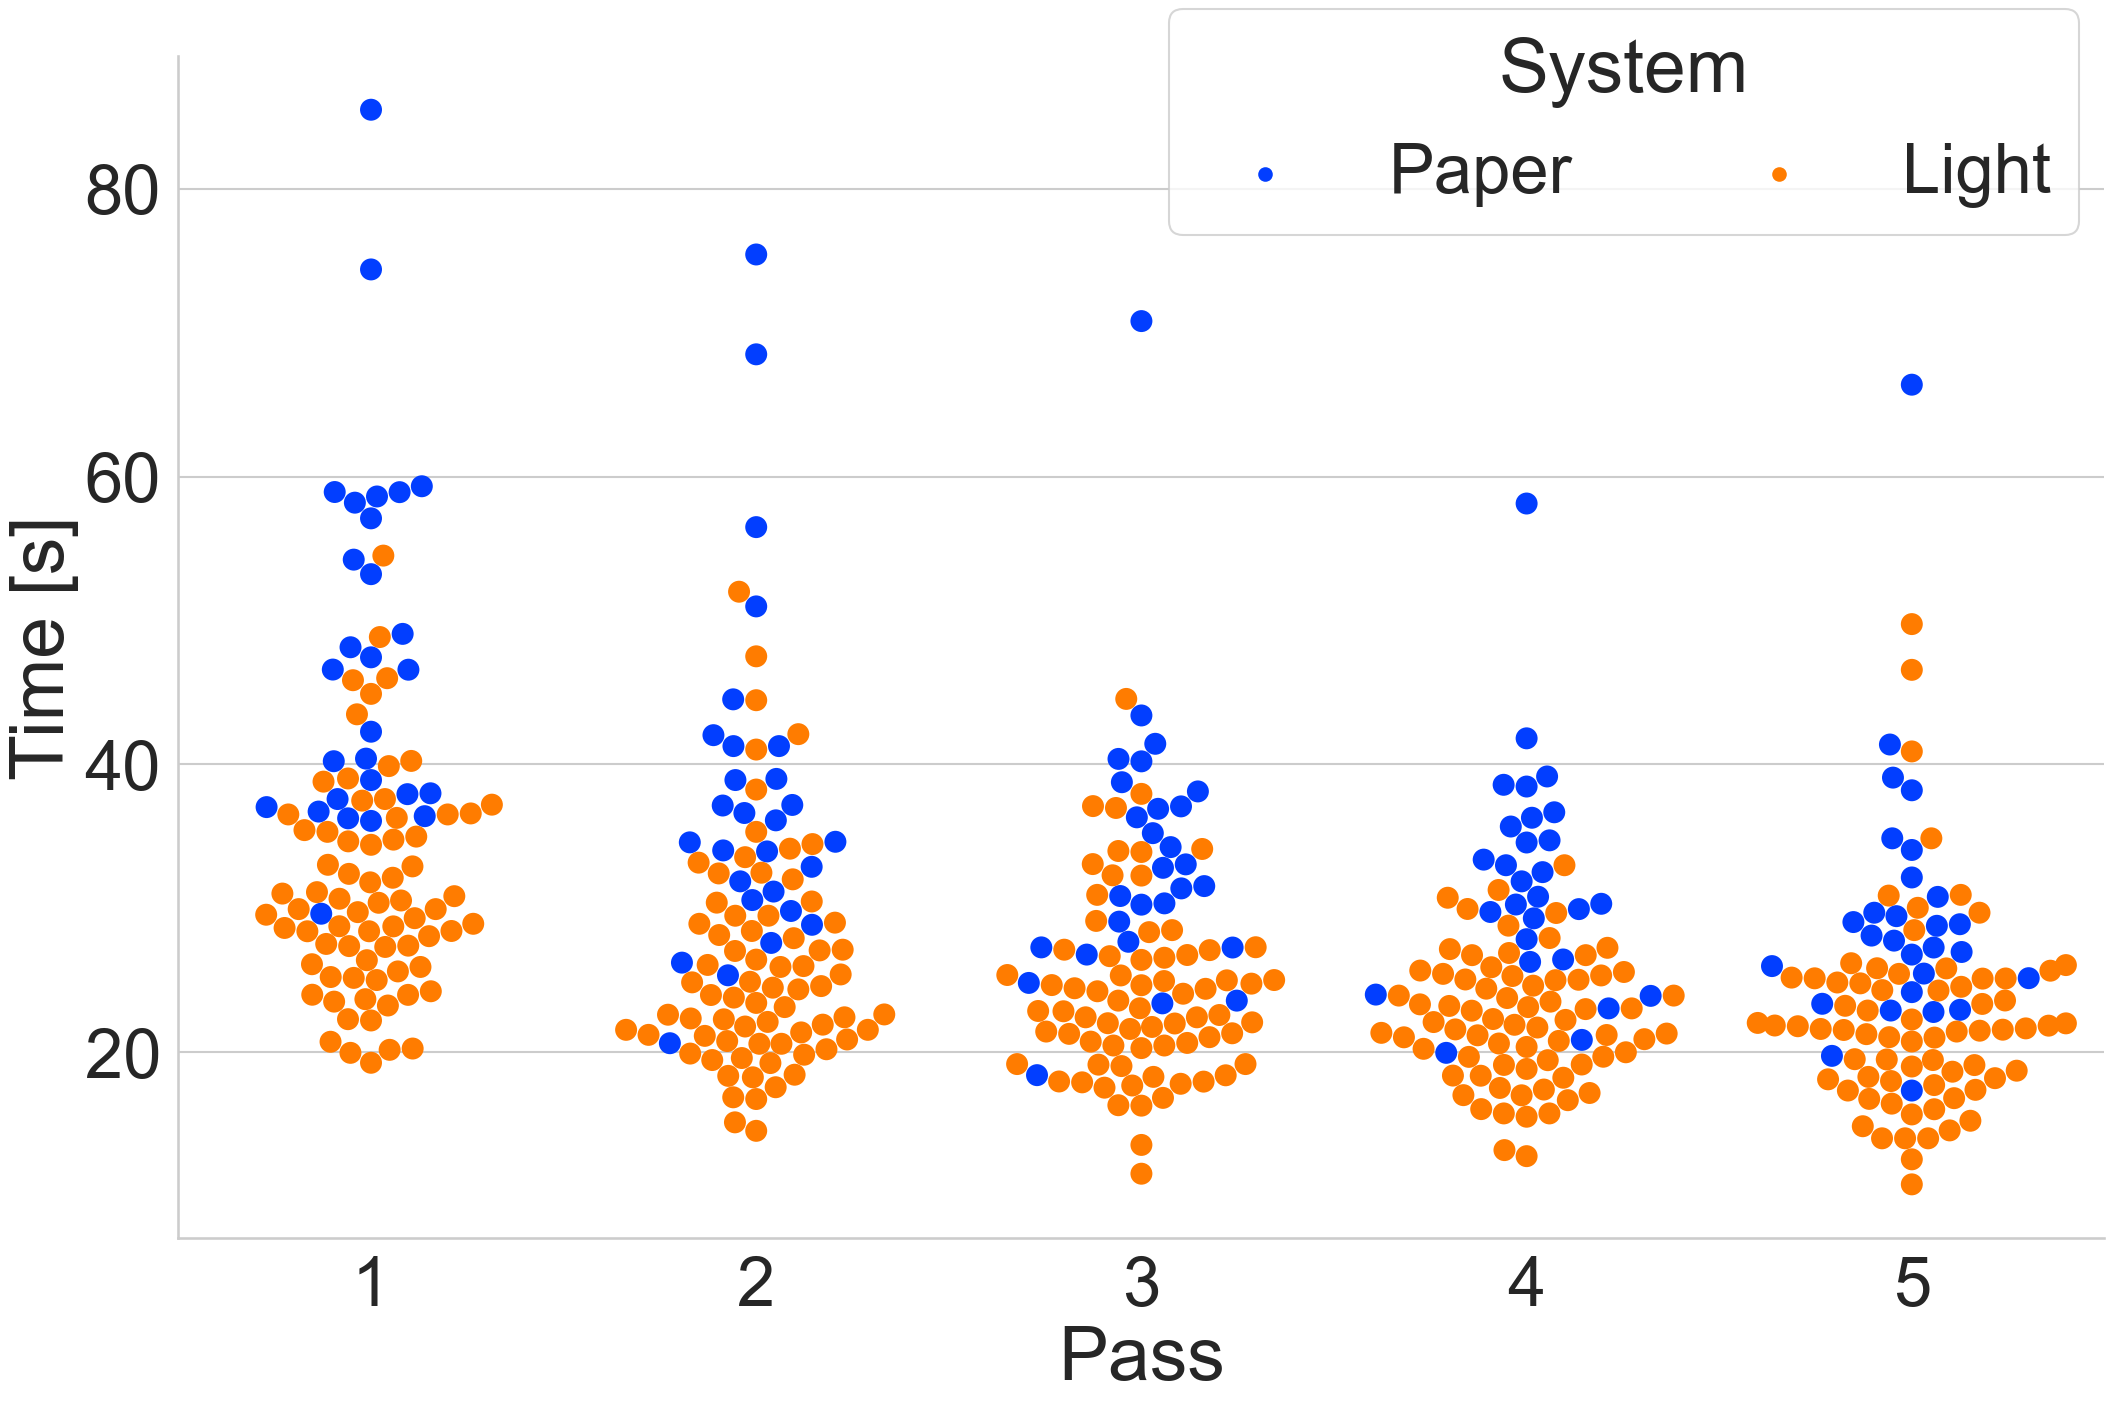

In [38]:
dane_pp=dane[dane['System'].isin(['Paper','Light'])]

sns.set_context('talk', font_scale=3)

# plt.rc('xtick', labelsize=44)
# plt.rc('ytick', labelsize=48)

g=sns.catplot(data=dane_pp,
           x='Pass',
           y='Time',
           hue='System',
           kind='swarm',
           s=250,
           height=15,
           aspect=1.5)
g.ax.set_ylabel('Time [s]')
sns.move_legend(g, 'upper center', bbox_to_anchor=(.65, 1), ncol=3, frameon=True)

plt.savefig('comp_prl_swarm.png')

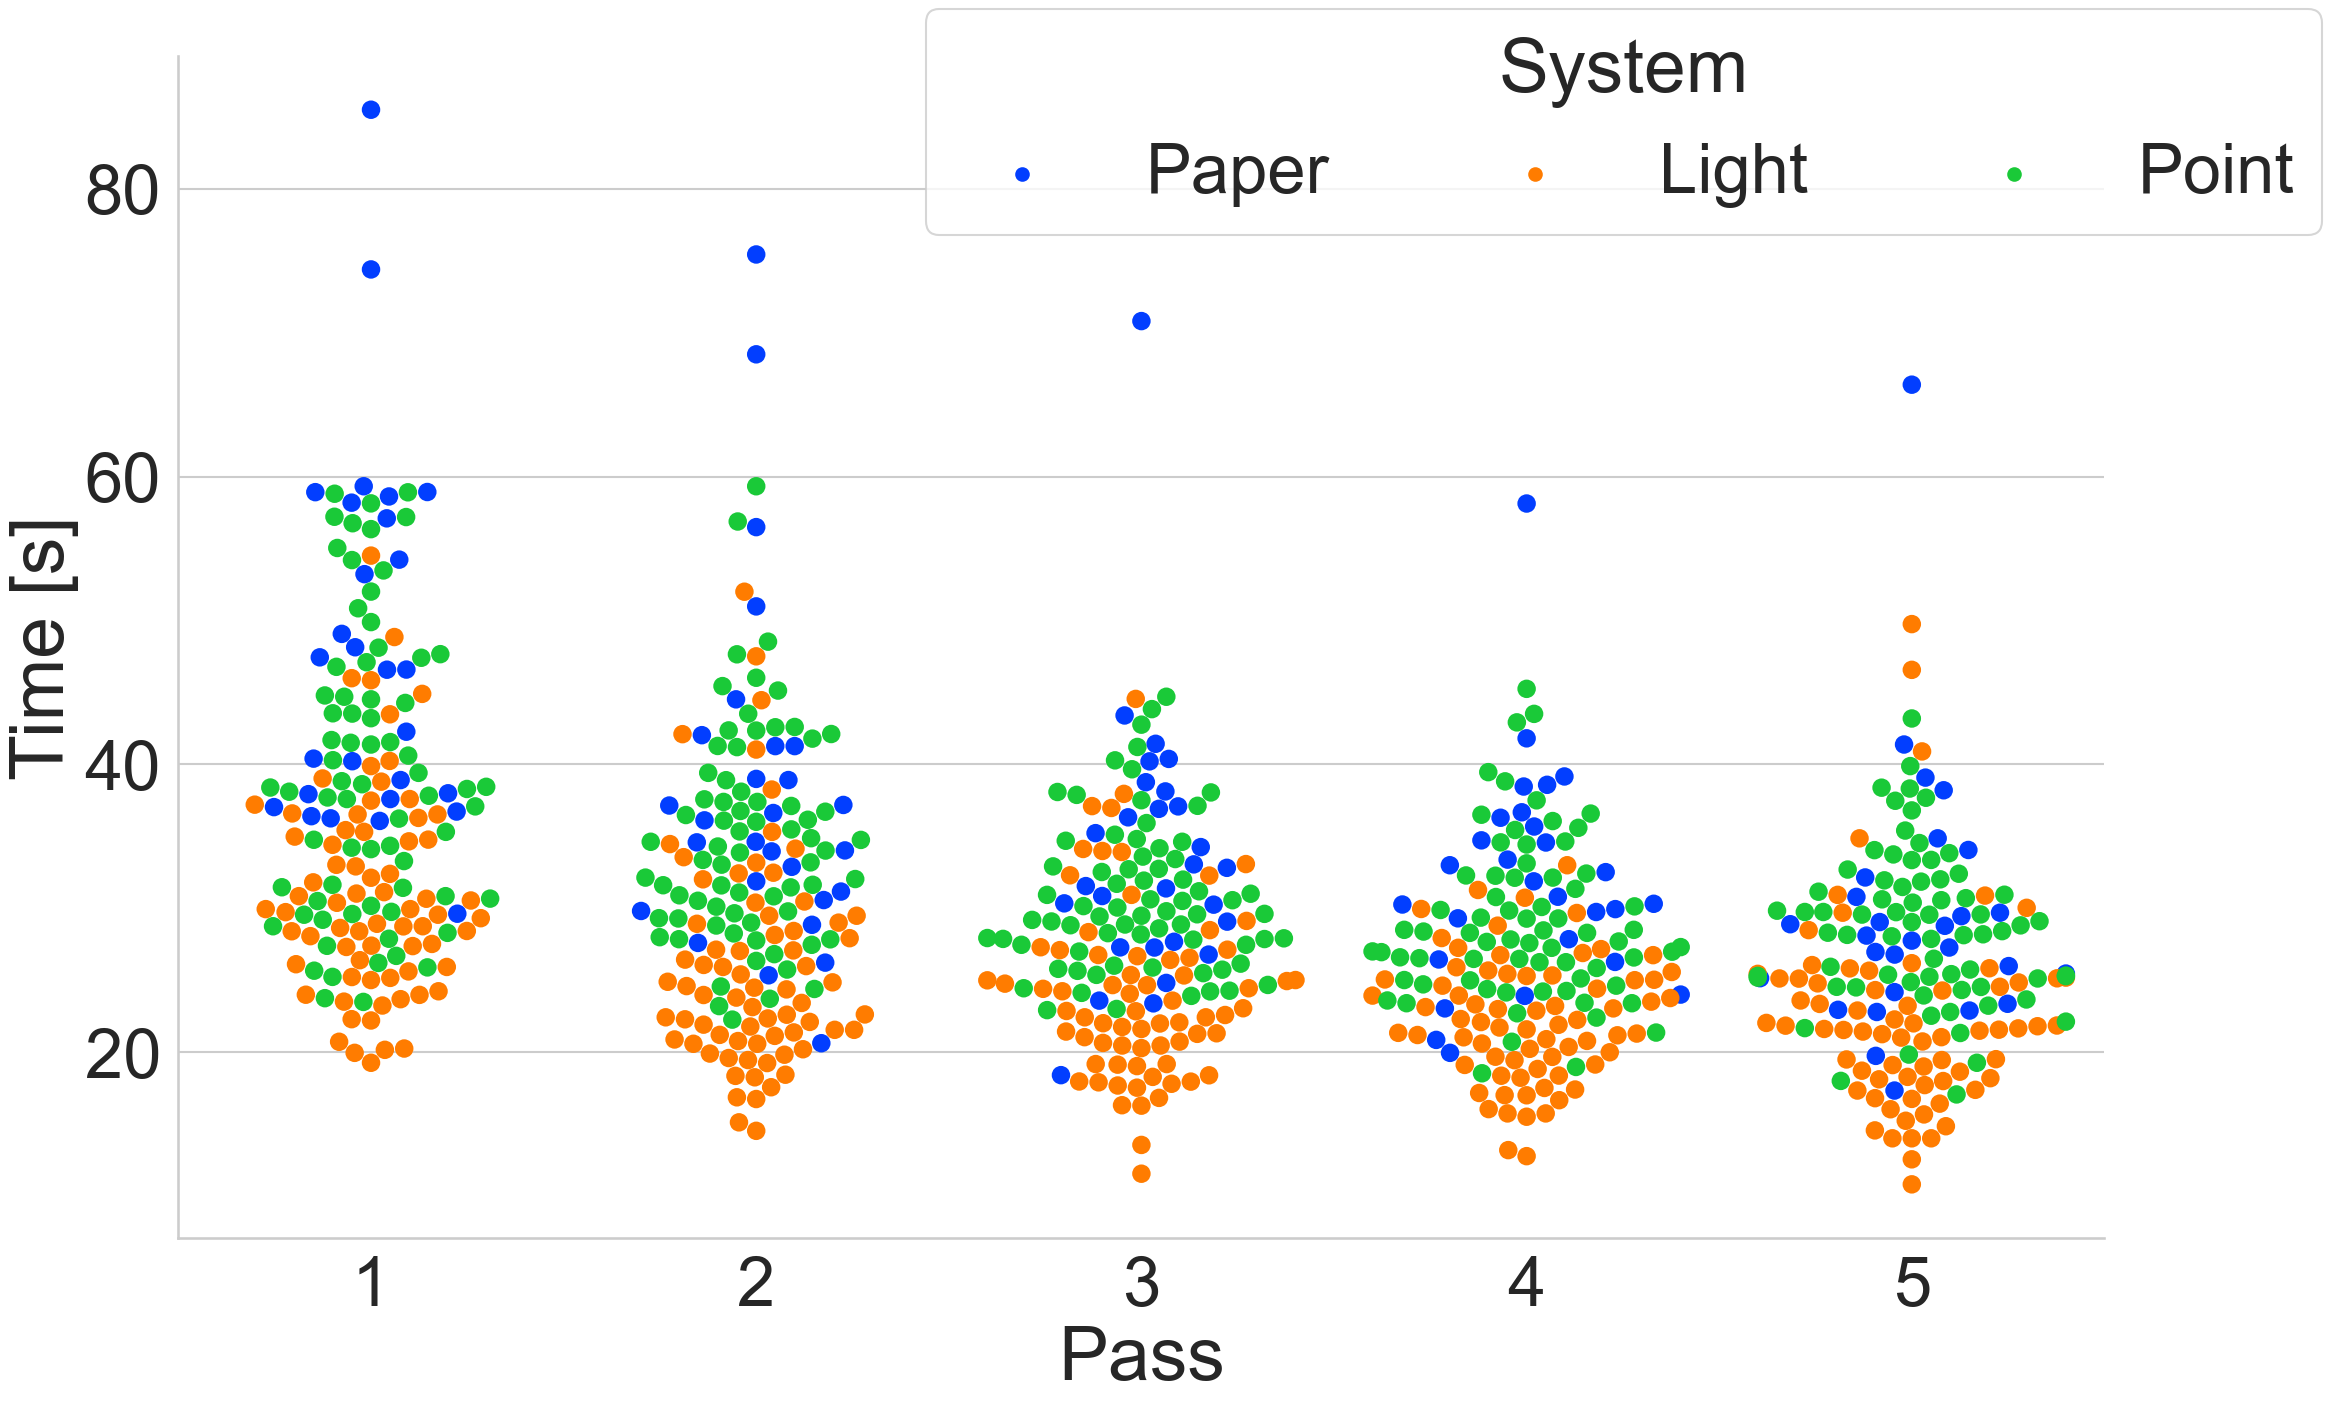

In [39]:
dane_pp=dane[dane['System'].isin(['Paper','Point', 'Light'])]

sns.set_context('talk', font_scale=3)

# plt.rc('xtick', labelsize=44)
# plt.rc('ytick', labelsize=48)

g=sns.catplot(data=dane_pp,
           x='Pass',
           y='Time',
           hue='System',
           kind='swarm',
            s=177,
           height=15,
           aspect=1.5)
g.ax.set_ylabel('Time [s]')

sns.move_legend(g, 'upper center', bbox_to_anchor=(.65, 1), ncol=3, frameon=True)

plt.savefig('comp_prpl_swarm.png')

<h1>Testy Shapiro-Wilka</h1>

In [40]:
from scipy.stats import wilcoxon, shapiro
dane.groupby(by=['System','Pass']).apply(lambda x: pd.Series(shapiro(x['Time']), index=['W', 'P']))

W         P
System Pass                    
Light  1     0.955894  0.013950
       2     0.902588  0.000044
       3     0.947441  0.004936
       4     0.993362  0.972754
       5     0.865003  0.000002
Paper  1     0.893014  0.007880
       2     0.847318  0.000826
       3     0.826906  0.000331
       4     0.911589  0.021598
       5     0.770967  0.000034
Point  1     0.953985  0.010985
       2     0.951409  0.007989
       3     0.943965  0.003268
       4     0.952194  0.008798
       5     0.988487  0.765610

<h1>Test Wilcoxona</h1>

In [41]:
from scipy.stats import wilcoxon

for System in ['Paper', 'Light', 'Point']:
    print('Pick-by-'+System)
    for Pass in [1, 2, 3, 4]:
        print('\tPass No. '+str(Pass) + '\t' + str(dane.where(dane['System']==System)["Time"]))

Pick-by-Paper
	Pass No. 1	0      37.99
1      37.93
2      36.72
3      49.07
4      37.03
       ...  
845      NaN
846      NaN
847      NaN
848      NaN
849      NaN
Name: Time, Length: 850, dtype: float64
	Pass No. 2	0      37.99
1      37.93
2      36.72
3      49.07
4      37.03
       ...  
845      NaN
846      NaN
847      NaN
848      NaN
849      NaN
Name: Time, Length: 850, dtype: float64
	Pass No. 3	0      37.99
1      37.93
2      36.72
3      49.07
4      37.03
       ...  
845      NaN
846      NaN
847      NaN
848      NaN
849      NaN
Name: Time, Length: 850, dtype: float64
	Pass No. 4	0      37.99
1      37.93
2      36.72
3      49.07
4      37.03
       ...  
845      NaN
846      NaN
847      NaN
848      NaN
849      NaN
Name: Time, Length: 850, dtype: float64
Pick-by-Light
	Pass No. 1	0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
845   NaN
846   NaN
847   NaN
848   NaN
849   NaN
Name: Time, Length: 850, dtype: float64
	Pass No. 2	0     NaN
1     Na

In [42]:
dane_diff.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2-1     170 non-null    float64
 1   3-2     170 non-null    float64
 2   4-3     170 non-null    float64
 3   5-4     170 non-null    float64
 4   System  170 non-null    object 
 5   Median  170 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.1+ KB


In [43]:
dane[dane['System']=='Point']

LP   Time System  Pass
495   1  31.63  Point     1
496   2  38.83  Point     1
497   3  25.89  Point     1
498   4  47.41  Point     1
499   5  44.70  Point     1
..   ..    ...    ...   ...
845  67  28.05  Point     5
846  68  29.04  Point     5
847  69  36.80  Point     5
848  70  25.18  Point     5
849  71  23.23  Point     5

[355 rows x 4 columns]

In [44]:
col_1, col_2 = dane_diff.columns[0:3], dane_diff.columns[1:4]

for System in ['Paper', 'Light', 'Point']:
    print(System)
    for i in [0,1,2]:
        dane_s = dane_diff[dane_diff['System']==System]
        print('\t' + col_1[i]+ ' '+ col_2[i] + '\t' 
              +str(wilcoxon(dane_s[col_2[i]], 
                            dane_s[col_1[i]], 
                            alternative='greater').pvalue))

Paper
	2-1 3-2	0.014025099575519562
	3-2 4-3	0.06875905022025108
	4-3 5-4	0.862964291125536
Light
	2-1 3-2	0.000646994803162282
	3-2 4-3	0.20628866387594075
	4-3 5-4	0.032518249970158265
Point
	2-1 3-2	0.13315763432319666
	3-2 4-3	0.007681210696894153
	4-3 5-4	0.011460620812364859


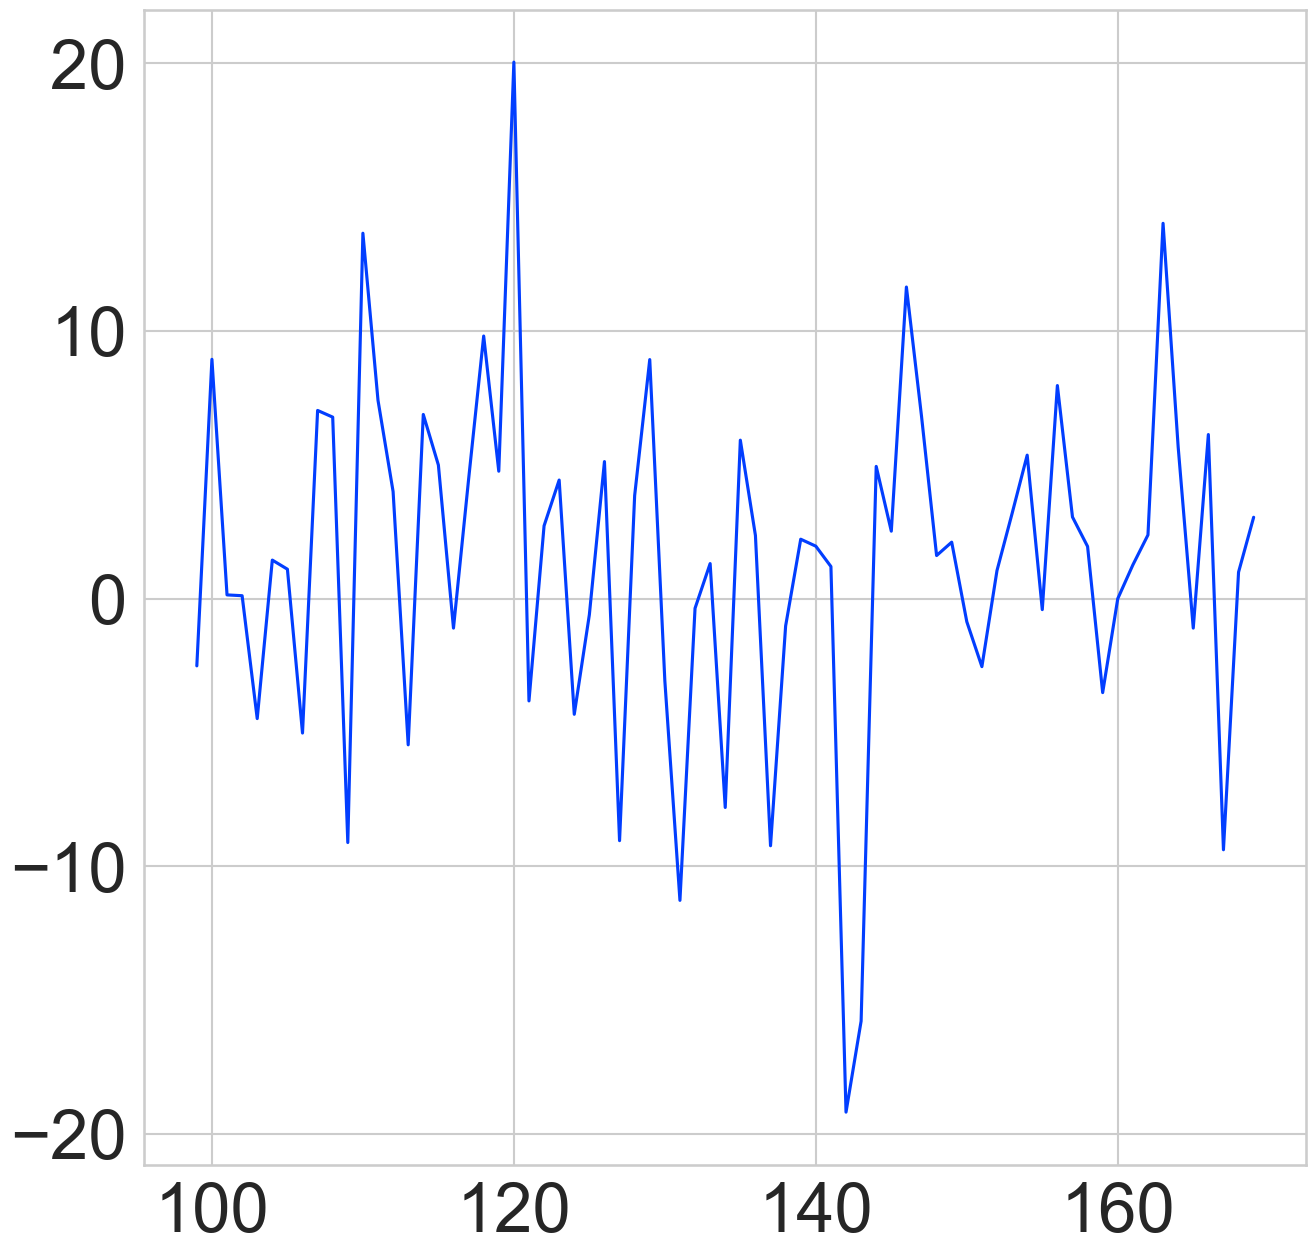

In [45]:
dane_d_p = dane_diff[dane_diff['System']==System]
ddp = dane_d_p[col_2[2]]-dane_d_p[col_1[2]]
len(ddp[ddp>0])
plt.plot(ddp)

In [46]:
for system in [paper, light, point]:
    for Pass in [1,2,3,4]:
        print('\t' + str(Pass+1) + '-'+ str(Pass) + '\t' 
              +str(wilcoxon(system[str(Pass+1)], 
                            system[str(Pass)], 
                            alternative='less',
                            zero_method='zsplit').pvalue))        
    print('\n')

	2-1	7.569789886474609e-06
	3-2	0.010204706341028214
	4-3	0.2610720358788967
	5-4	0.008943457156419754


	2-1	5.102996263946909e-08
	3-2	0.0004012068340465717
	4-3	0.00014496865951788509
	5-4	0.027278506325679536


	2-1	1.6848276249696482e-06
	3-2	6.559393257972494e-08
	4-3	0.0005453659592012315
	5-4	0.23252487178086617




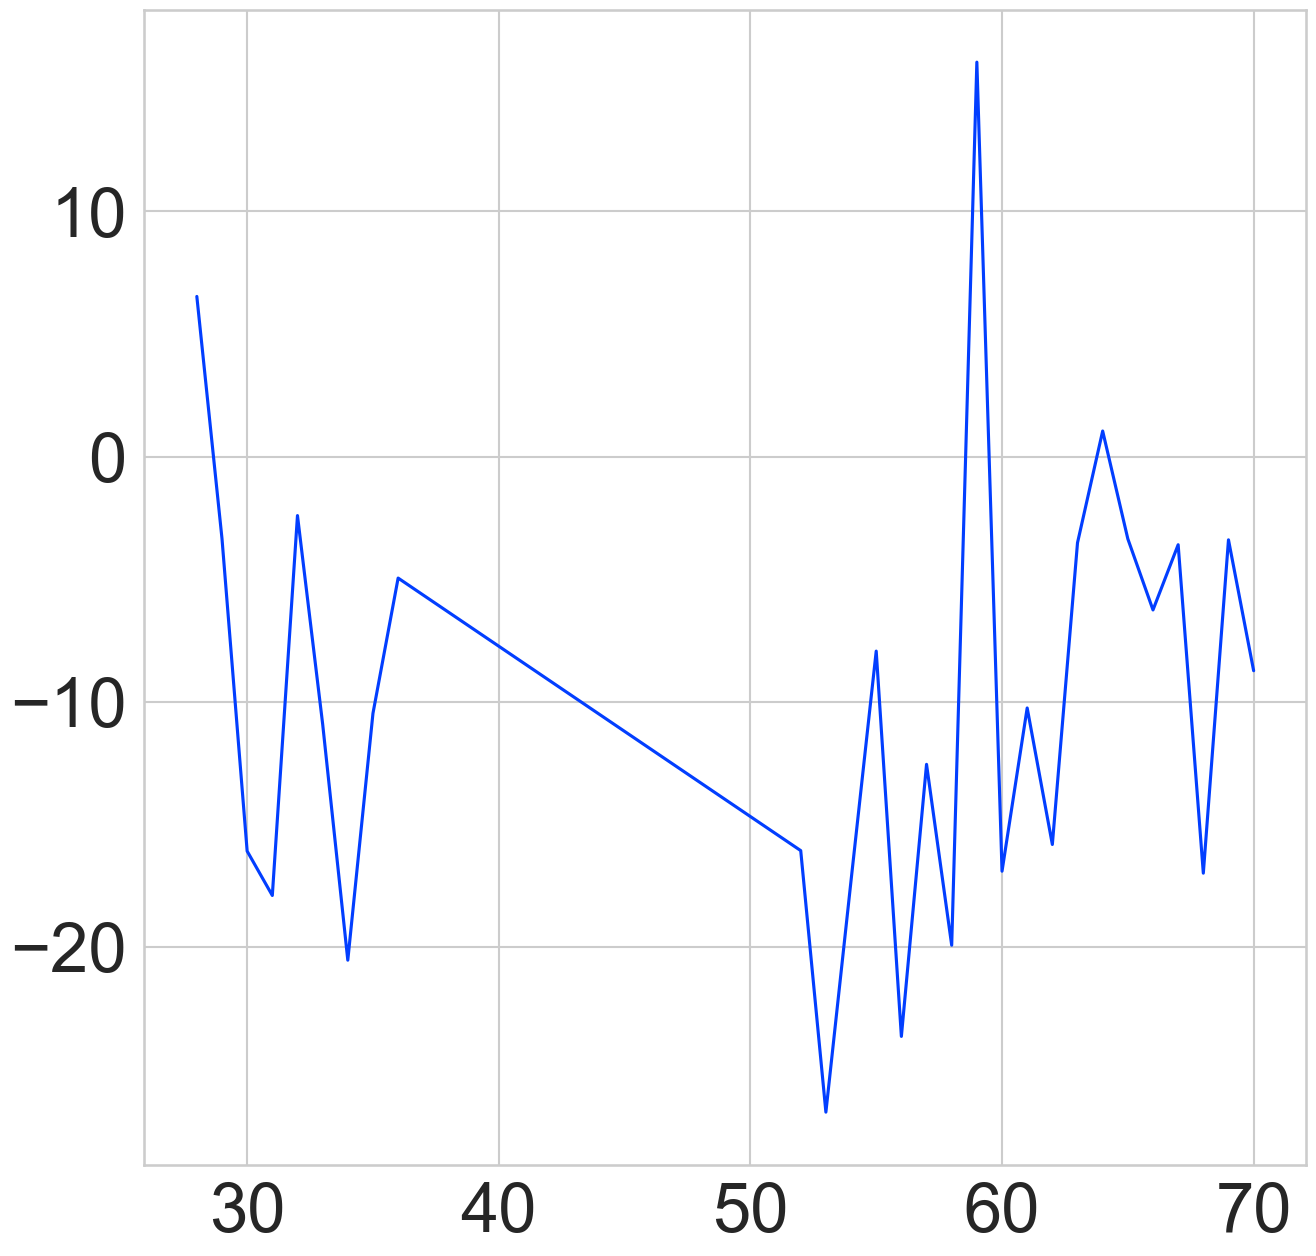

In [47]:
plt.plot(paper['2']-paper['1'])

In [48]:
from scipy.stats import mannwhitneyu
for Pass in [1,2,3,4,5]:
#     print(str(Pass+1) + " " + str(Pass))
    print(str(Pass)+ '\t' + str(mannwhitneyu(paper[str(Pass)], 
#                                          point[point['LP'].isin(paper['LP'].to_list())][str(Pass)],
                                         point[str(Pass)],
                                        alternative='two-sided').pvalue))

1	0.0026407233410056887
2	0.33925719963942624
3	0.13075276500999097
4	0.03840058408590102
5	0.7767304001170017


In [49]:
paper

LP Imię i Nazwisko      1      2      3      4      5   6  Błędy  \
28  29            Gr.3  37.99  44.52  24.81  36.67  29.45 NaN      2   
29  30             NaN  37.93  34.58  43.40  29.94  28.78 NaN      2   
30  31             NaN  36.72  20.62  41.43  24.00  22.89 NaN      5   
31  32             NaN  49.07  31.16  18.40  19.95  17.33 NaN      0   
32  33             NaN  37.03  34.62  23.58  33.38  28.89 NaN      2   
33  34             NaN  36.25  25.34  23.39  23.04  19.74 NaN      0   
34  35             NaN  48.14  27.59  27.67  27.85  22.79 NaN      2   
35  36             NaN  46.59  36.11  32.81  30.80  28.10 NaN      0   
36  37             NaN  38.91  33.95  40.38  23.91  29.69 NaN      0   
52  53    Zaoczni gr.1  53.22  37.14  36.91  41.81  34.86 NaN      7   
53  54             NaN  58.62  31.87  31.54  29.74  30.79 NaN      0   
54  55             NaN  59.33  42.03  38.76  38.46  38.20 NaN      0   
55  56             NaN  58.92  50.98  33.05  32.99  32.14 NaN      2   
56  57             NaN  54.23  30.57  30.34  31.87  23.36 NaN      1   
57  58             NaN  46.58  34.02  30.25  30.26  29.04 NaN      2   
58  59             NaN  58.93  38.99  31.38  32.51  26.78 NaN      0   
59  60             NaN  40.40  56.49  37.08  39.16  41.38 NaN      5   
60  61             NaN  58.19  41.27  38.12  34.72  26.96 NaN      2   
61  62             NaN  47.44  37.18  29.07  34.57  34.05 NaN      0   
62  63    Zaoczni gr.2  57.10  41.27  34.25  30.31  39.08 NaN      2   
63  64             NaN  36.40  32.88  36.32  38.58  25.46 NaN      0   
64  65             NaN  74.40  75.44  40.21  35.68  27.75 NaN      4   
65  66             NaN  42.27  38.91  30.85  20.85  27.27 NaN      0   
66  67             NaN  36.07  29.81  35.22  36.29  24.17 NaN      1   
67  68             NaN  40.22  36.62  27.27  26.27  25.14 NaN      2   
68  69             NaN  85.50  68.50  70.81  58.13  66.39 NaN      7   
69  70             NaN  29.62  26.22  27.28  26.44  22.94 NaN      0   
70  71             NaN  37.59  28.85  26.78  29.30  25.98 NaN      0   

                      Uwagi System  
28                      NaN  Paper  
29                      NaN  Paper  
30                      NaN  Paper  
31                      NaN  Paper  
32                      NaN  Paper  
33                      NaN  Paper  
34                      NaN  Paper  
35                      NaN  Paper  
36                      NaN  Paper  
52                      NaN  Paper  
53                      NaN  Paper  
54                      NaN  Paper  
55                      NaN  Paper  
56                      NaN  Paper  
57                      NaN  Paper  
58                      NaN  Paper  
59                      NaN  Paper  
60                      NaN  Paper  
61                      NaN  Paper  
62                      NaN  Paper  
63                      NaN  Paper  
64                      NaN  Paper  
65                      NaN  Paper  
66                      NaN  Paper  
67                      NaN  Paper  
68                      NaN  Paper  
69  9 lat pracy w magazynie  Paper  
70                      NaN  Paper